In [73]:
%matplotlib inline

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

import statsmodels.api as sm
norms = sm.robust.norms
from wotan import flatten

In [20]:
try:
    long_df = pd.read_csv('./Training_Data/sclerochronology_training_10.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [60]:
try:
    df = pd.read_csv('./Training_Data/tree/training_tree_3.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [7]:
try:
    df = pd.read_csv('./Training_Data/no_match_test_data.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [ ]:
SLC08A

In [53]:
df.head()

master_chronology  SLC08A
year                           
1630           2.235870     NaN
1631           1.132329     NaN
1632          -0.841564     NaN
1633          -0.130124     NaN
1634           1.247763     NaN

In [177]:
long_df.head()
long_df.shape

(366, 58)

In [178]:
df_master = long_df.iloc[:, : 20]
df_master.shape
df_master.head()
#df_master.tail()
#print(1995-1630)

SLC01A  SLC01B  SLC02A  SLC02B  SLC03A  SLC03B  SLC04A  SLC04B  SLC05A  \
year                                                                           
1630     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1631     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1632     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1633     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1634     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

      SLC05B  SLC06A  SLC06B  SLC07A  SLC07B  SLC08A  SLC08B  SLC09A  SLC09B  \
year                                                                           
1630     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1631     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1632     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1633     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1634     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

      SLC11C  SLC13A  
year                  
1630     NaN     NaN  
1631     NaN     NaN  
1632     NaN     NaN  
1633     NaN     NaN  
1634     NaN     NaN

In [443]:
def rename_dataframe(df):

    assert len(df.columns) == 2, "Dataframe does not contain 2 columns please reenter a new csv in the correct form."
    column = list(df.columns)
    print(column)
    df = df.rename({column[0]: "master_chronology", column[1]: "sample"}, axis = 1)
    return df


In [444]:
rename_dataframe(df)

['master_chronology1', '61257']


master_chronology    sample
year                             
649            1.936838       NaN
650            1.605328       NaN
651            1.079118       NaN
652            0.424857       NaN
653           -0.415379       NaN
...                 ...       ...
2001           1.657925  1.802389
2002           1.434835  1.250185
2003           0.682095       NaN
2004           0.214842       NaN
2005           1.269459       NaN

[1357 rows x 2 columns]

In [179]:
dendro = df_master.to_numpy()

print(dendro.shape)
print(dendro[0])
averaging = []
for i in range(dendro.shape[0]):
    name = str("average" + str(i))
    name = dendro[i]
    averaging.append(dendro[i])
    i += 1

def biweight_mean(list):
    x_star = np.mean(list[0])
    x = list
    u_vals = []
    w_vals = []
    
    c = 4.685
    for i in range(x):
        u_vals = (x[i]-x_star/np.median(np.absolute(x - np.median(x))))
        if np.absolute(u_vals<=c):
            w_vals = (1-(u_vals/c)**2)
        else:
            w_vals = (0)
    biweight = (np.sum(w_vals)*np.sum(x)/np.sum(w_vals))
    x_star = biweight
    return biweight

(366, 20)
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]


In [180]:
master_chronology = []
for i in range(len(averaging)):
    biweight = biweight_mean(averaging[i])
    master_chronology.append(biweight)
    

print(master_chronology)
print(len(master_chronology))

TypeError: only integer scalar arrays can be converted to a scalar index

In [181]:
df_master.head()

SLC01A  SLC01B  SLC02A  SLC02B  SLC03A  SLC03B  SLC04A  SLC04B  SLC05A  \
year                                                                           
1630     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1631     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1632     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1633     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1634     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

      SLC05B  SLC06A  SLC06B  SLC07A  SLC07B  SLC08A  SLC08B  SLC09A  SLC09B  \
year                                                                           
1630     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1631     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1632     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1633     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1634     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

      SLC11C  SLC13A  
year                  
1630     NaN     NaN  
1631     NaN     NaN  
1632     NaN     NaN  
1633     NaN     NaN  
1634     NaN     NaN

In [381]:
df.head()

master_chronology1  61251  Algined  Algined2  Large_Algined
year                                                             
649             1.936838    NaN      NaN       NaN            NaN
650             1.605328    NaN      NaN       NaN            NaN
651             1.079118    NaN      NaN       NaN            NaN
652             0.424857    NaN      NaN       NaN            NaN
653            -0.415379    NaN      NaN       NaN            NaN

In [6]:
samples = []
i= 0
for col in df.columns:
    col_list = df[col].tolist()
    cleanedList = [x for x in col_list if x == x]
    samples.append(cleanedList)
print(samples)
print(len(samples))
print(len(samples[1]))  


[[2.235869998, 1.132328703, -0.841564282, -0.130123647, 1.247762822, 1.638606085, 0.222738524, 1.203137934, 2.055554049, 1.195772282, 1.715856875, 1.386419714, 1.509306738, -0.36778324, -0.453077169, 0.771905572, 1.413592355, 0.820585831, 0.180248886, 0.715319634, 1.978084087, 0.935713879, 0.445541163, 0.877161519, 1.361232496, 2.339152265, 0.566461604, 1.53362851, 0.540780673, 0.308551136, 2.044395312, 1.47138373, 1.475049439, 1.691701112, 0.900841121, 1.267905212, -0.014071594, 0.910193182, -0.400849161, -1.45354612, -0.294211864, -0.266837394, -0.088826567, 2.092952082, 3.398928031, 1.912562577, 0.278125187, 1.6785953, 0.074105503, 1.254530137, 2.259505324, 1.61886373, 1.334944069, 1.124796033, 1.078302631, -1.15032024, -0.055803224, 0.009875286, 0.298643013, 1.157698215, 1.808604723, 0.801203035, 1.338288809, 1.158238639, 1.151479022, 2.438930843, 0.05858434, 1.263130567, 1.203910163, 0.763167973, 0.294965051, 1.777691384, 1.613658193, 0.954481904, 0.38777415, 0.21942618, 0.1322443

# Testing the Heatmap criteria

In [262]:
testing = [samples[1], samples[1]]

In [263]:
test_segments = {}

size = 10
step = 1
length = len(testing)
for j in range(length):
    test_segments[j] = ([testing[j][i : i + size] for i in range(0, len(testing[j]), step)])
    j+=1
#print(segments[0])
#print(segments[1])

test_short = []

for i in range(len(test_segments)):
    for j in range(len(test_segments[i])):
        if len(test_segments[i][j]) != 10:
            #print(segments[i][j])
            test_short.append(test_segments[i][j])
            j+=1
        else:
            continue
    i+=1

#print(short)
test_segments0 = [x for x in test_segments[0] if x not in test_short]
test_segments1 = [x for x in test_segments[1] if x not in test_short]
    
#print(segments0)

test_segments[0] = test_segments0
test_segments[1] = test_segments1
test_segments[0][-1]
assert len(test_segments[0][-1]) == 10
assert len(test_segments[1][-1]) == 10
print(len(test_segments[0]))


54


In [264]:
test_master_segments = test_segments[0]
test_sample_segments = test_segments[1]
test_pairs =  [(x,y) for x in test_master_segments for y in test_sample_segments]
#print(pairs)

print(len(test_pairs))
print(test_pairs[0])

2916
([0.308936361, 1.924613236, -0.10128158, 2.605036373, 1.699304928, 0.027098646, 1.589876781, -1.040348953, 1.647385572, 0.193615986], [0.308936361, 1.924613236, -0.10128158, 2.605036373, 1.699304928, 0.027098646, 1.589876781, -1.040348953, 1.647385572, 0.193615986])


In [90]:
import scipy.stats
test_t_vals = {}
for i in range(len(test_pairs)):
    (test_seg1, test_seg2) = test_pairs[i]
    if len(test_seg1) == len(test_seg2) == 10:
        r = np.corrcoef(test_seg1, test_seg2)[1,0]
        n = min(len(test_seg1), len(test_seg2))
        t = (r * (np.sqrt(n - 2)) / (np.sqrt(1 - (r * r))))
        print(t)
        test_t_vals[str(i) + " " + str(t)] = (test_seg1, test_seg2)
    else: 
        print(test_seg1,test_seg2)
#print(t_vals)
print(len(test_t_vals))
#t_vals.keys()

NameError: name 'test_pairs' is not defined

In [266]:
test_values = list(test_t_vals.keys())
for i in range(len(test_values)):
    test_values[i] = float(test_values[i].split()[-1])
    
print(test_values)

print(len(test_values)/59)
n = 10
endlist = [[] for _ in range(n)]
for index, item in enumerate(test_values):
    endlist[index % n].append(item)
#print(endlist)

test_strides = [0]
length = int(len(test_values)//59)
for i in range(length):
    test_strides.append(59+i)
    i+=1

chronology = []
t_values_samples = []

for i in range(59):
    for j in range(len(test_strides)):
        chronology.append(test_values[test_strides[j]])
        j+=1
    test_strides = [x+1 for x in test_strides]
    t_values_samples.append(chronology)
    chronology = []
    i+=1
result = []
for i in range(len(t_values_samples)):
    result.append(sum(abs(float(number)) for number in t_values_samples[i]))
max_list = (max(result, key=abs))

print(result.index(max_list))

max_val = (max(t_values_samples[25], key=abs))
print(max_list)
print(max_val)
#print(t_values_samples)
#print(len(t_values_samples))
std = np.std(test_values)
mean = np.mean(test_values)
#print(mean)
out_up = mean+3*std
#print(out_up)
out_down = mean-3*std
#print(out_down)
outlying = []
for x in range(len(test_values)):
    if test_values[x] >= out_up or test_values[x] <= out_down: 
        outlying.append(test_values[x])
#print(outlying)


[134217727.99999999, -2.1070484476438534, 1.4095340224825572, -0.9212305081118082, -0.7155638216973129, 0.4753092368743968, -1.0442875195317587, 1.0070182639646599, -3.1554729903222865, 1.217701179396878, -0.902979503366478, 2.5319467906281554, 0.6008207836735129, -0.1324626784839791, 0.5439595851670306, -1.2537603441548006, 3.4723929356780867, -2.0008164816234135, 1.6051848969868512, -1.113144397812973, -0.14914712330752242, 0.18171496879865248, -1.2259692885207985, -0.6732041602674551, -0.3061623973700073, -0.09569509977607245, 1.2946942873556249, 0.4608107345550386, 0.299048077940178, 0.9940919648564213, -0.6416739431380867, -0.31853359386969193, 0.16784517604441918, 0.3891793862474689, 0.6990240054031963, -0.7537677992426257, -0.2042297225427625, -1.0795077375542752, -0.7510552215346123, -0.2767106966256732, -0.15723652348936085, 2.2122903729420305, 0.3852935291452723, 0.2770931381871599, -0.024087122649035172, -1.189379469845114, 0.03673097196873207, 0.060570070534898754, 0.838024

/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [267]:
print(len(test_t_vals.keys()) / 59)
test_heatmap =np.array(np.split(np.array(test_values), 59, axis=0))
test_heatmap.shape

49.42372881355932


ValueError: array split does not result in an equal division

In [ ]:
sns.set(rc={'figure.figsize':(20,13)})
sns.heatmap(test_heatmap, cmap="YlGnBu", vmax= 3)
plt.show()

# Small Segment Statistical Method

In [91]:
#Helper method: Splitting an array into even sized chunks with a given overlap. (Using lists of lists and dictionaries.)

segments = {}

size = 10
step = 1
length = len(samples)
for j in range(length):
    segments[j] = ([samples[j][i : i + size] for i in range(0, len(samples[j]), step)])
    j+=1
#print(segments[0])
#print(segments[1])

short = []

for i in range(len(segments)):
    for j in range(len(segments[i])):
        if len(segments[i][j]) != 10:
            #print(segments[i][j])
            short.append(segments[i][j])
            j+=1
        else:
            continue
    i+=1

#print(short)
segments0 = [x for x in segments[0] if x not in short]
segments1 = [x for x in segments[1] if x not in short]
    
#print(segments0)

segments[0] = segments0
segments[1] = segments1
segments[0][-1]
assert len(segments[0][-1]) == 10
assert len(segments[1][-1]) == 10
print(len(segments[1]))

101


In [92]:
#Get every combination of the sample segment with the first master segement then moves onto the next one and so on
master_segments = segments[0]
sample_segments = segments[1]
pairs =  [(x,y) for x in master_segments for y in sample_segments]
#print(pairs)

print(len(pairs))
len(pairs) /42

36057


858.5

In [97]:
import scipy.stats
t_vals = {}
for i in range(len(pairs)):
    (seg1, seg2) = pairs[i]
    if len(seg1) == len(seg2) == 10:
        r = np.corrcoef(seg1, seg2)[1,0]
        n = min(len(seg1), len(seg2))
        t = (r * (np.sqrt(n - 2)) / (np.sqrt(1 - (r * r))))
        t_vals[t] = (seg1,seg2)
    else: 
        print(seg1,seg2)
#print(t_vals)
print(len(t_vals))
#t_vals.keys()

36057


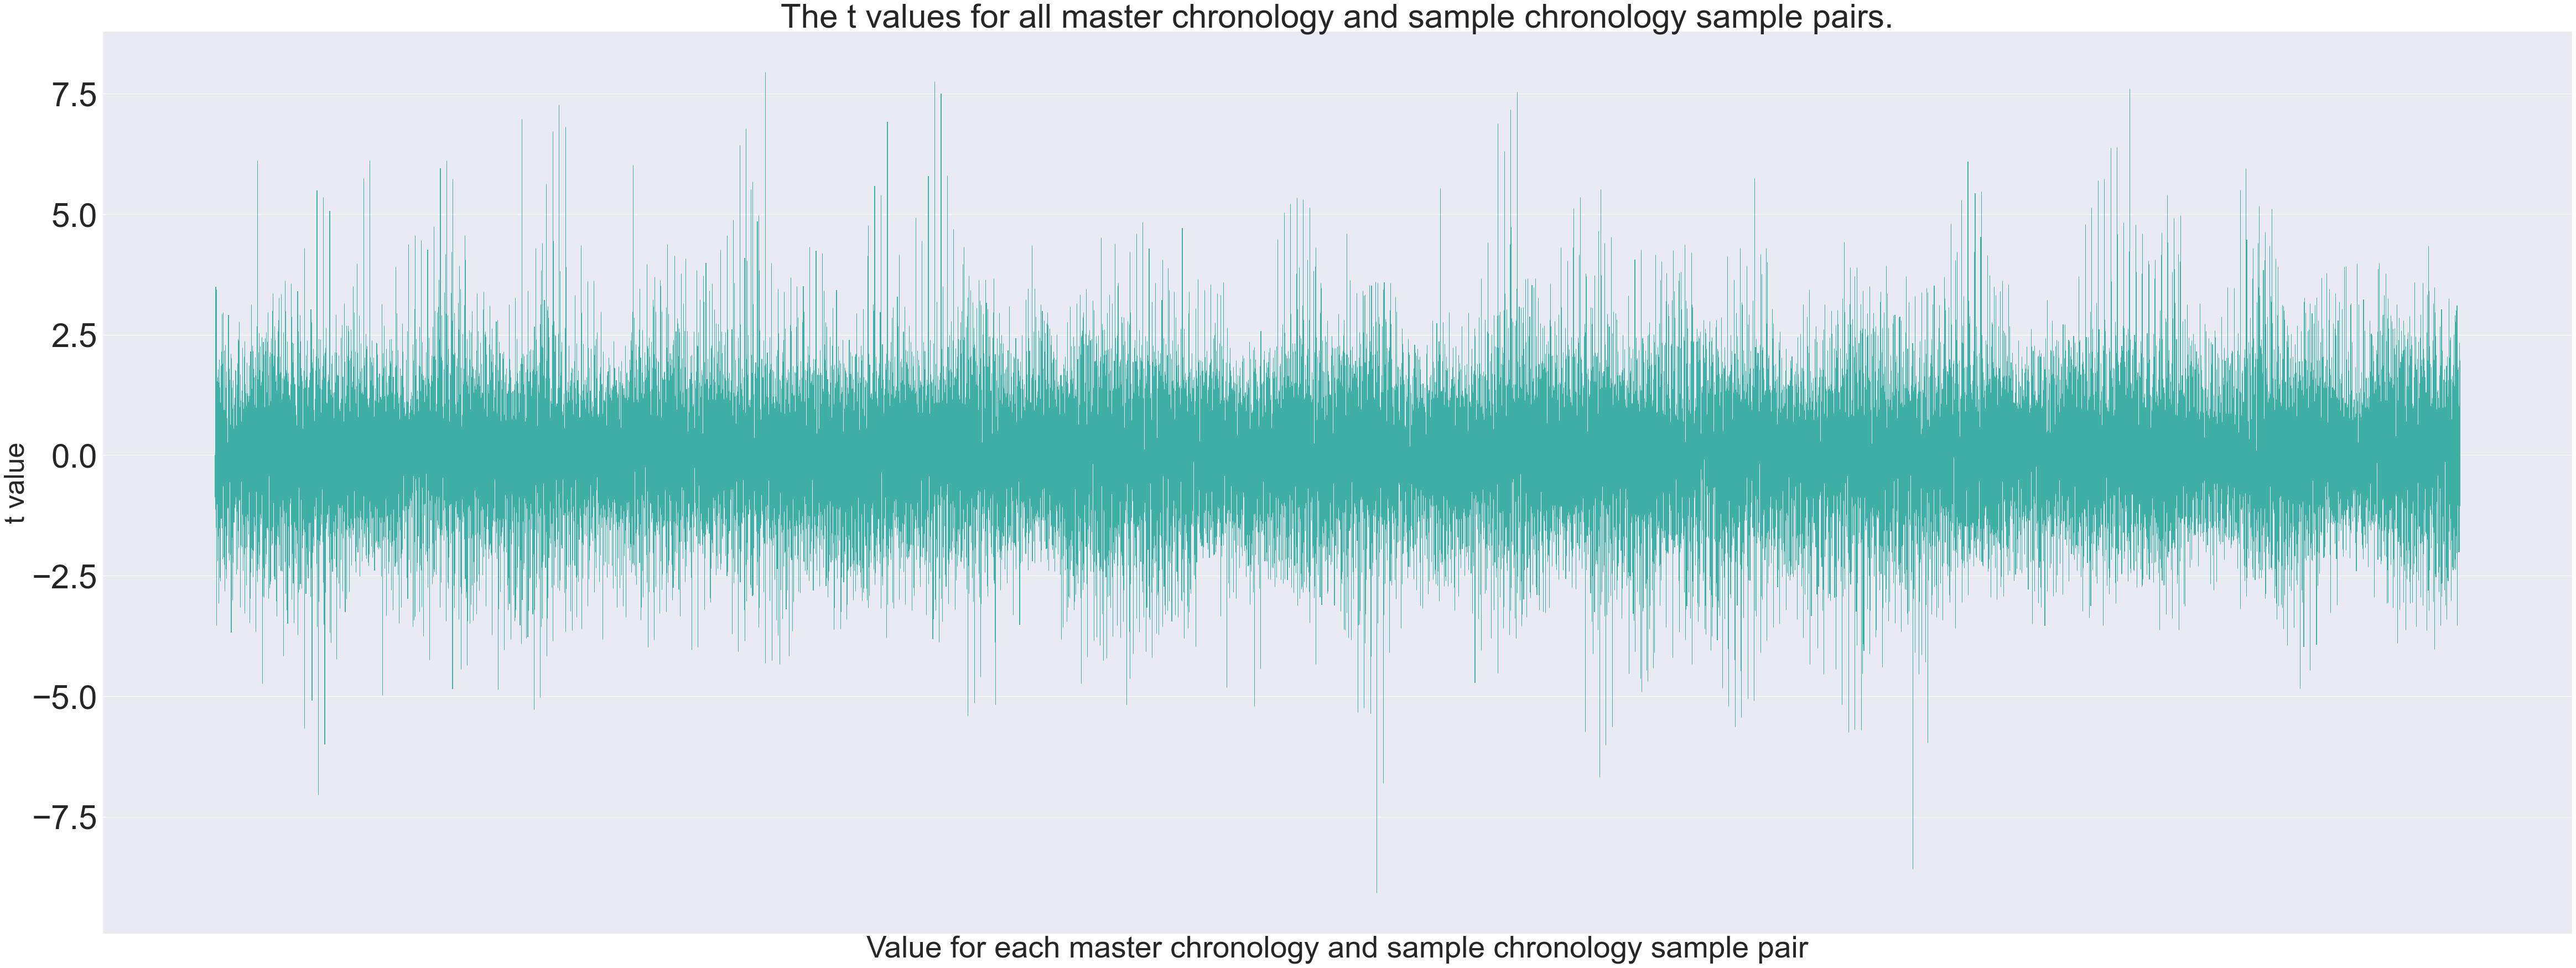

In [105]:
values = list(t_vals.keys())
sns.set(rc={'figure.figsize':(80,30)})
plt.bar( list(range(len(values))), values, color=["#40B0A6"],  edgecolor='#40B0A6')
plt.xticks([])
plt.yticks(fontsize=60)
plt.xlabel("Value for each master chronology and sample chronology sample pair", fontsize=55)
plt.ylabel("t value",fontsize=50)
plt.title("The t values for all master chronology and sample chronology sample pairs.",fontsize=60)
plt.show()

In [10]:
#print(outlying)

#Find the length of the list of pairs for the sample list
#Make sure all the lists of length less than 10 are deleted 
#Collect the t values with a loop using a gap of the list length + 1 and then adding one
#Find the highest 3 lists with the most consistant high t values
#Check these t values are actually statisically signinficant
#Add the padding and place the chronologies into the dataframe


values = list(t_vals.keys())
for i in range(len(values)):
    values[i] = float(values[i].split()[-1])


    
    
#print(t_values_samples)
#print(len(t_values_samples))
std = np.std(values)
mean = np.mean(values)
#print(mean)
out_up = mean+3*std
#print(out_up)
out_down = mean-3*std
#print(out_down)
outlying = []
for x in range(len(values)):
    if values[x] >= out_up or values[x] <= out_down: 
        outlying.append(values[x])

stri = len(segments[1])+1
x=list(map(str,outlying))
z="-".join(x)
contender = []
stride = len(segments[1]) 

print(outlying)    
for y in range(len(outlying)):
    ind = values.index(outlying[y])

    if z.find(str(values[ind + stri])) != -1:
        if z.find(str(values[ind + stri + stri])) != -1:
            if z.find(str(values[ind + stri + stri + stri])) != -1:
                if z.find(str(values[ind + stri + stri + stri + stri])) != -1:
                    if z.find(str(values[ind + stri + stri + stri + stri + stri])) != -1:
                        if z.find(str(values[ind + stri + stri + stri + stri + stri + stri])) != -1:
                            if z.find(str(values[ind + stri + stri + stri + stri + stri + stri + stri])) != -1:
                                if z.find(str(values[ind + stri + stri + stri + stri + stri + stri + stri + stri])) != -1:
                                    contender.append(outlying[y])
                                    y+=1
                                else:
                                    y+=1
                            else:
                                y+=1
                        else:
                            y+=1
                    else:
                        y+=1        
                else:
                    y+=1
            else:
                y+=1
        else: 
            y+=1
    else:
        y+=1

print(len(outlying))  
print(len(contender))
print(contender)
    
max_outlying = (max(values, key=abs))
print(values.index(max_outlying))
max_outlying = str(str(values.index(max_outlying)) + ' ' + str(max_outlying))
print(max_outlying)
max_contender = (max(contender, key=abs))
print(max_contender)
max_contender = str(str(values.index(max_contender)) + ' ' + str(max_contender))
print(max_contender)
top_contenders = []
for i in range(3):
    max_contender = (max(contender, key=abs))
    contender.remove(max_contender)
    max_contender = str(values.index(max_contender)) + ' ' + str(max_contender)
    top_contenders.append(max_contender)
    i+=1
print(top_contenders)

[6.1109023213346925, -4.735801563074627, -4.161196982191066, -3.7287162035927057, 4.299153161622678, -5.672283438566621, -5.079822648225627, 5.496808935532326, -7.042547005161926, 5.3536236583592824, -5.990539276391282, 5.064260185774355, -3.6778097301793595, -3.891449522829755, -4.229896748373299, 3.979290666232075, 5.7421632136432486, 6.110141739354393, -4.974674128063974, 3.9068524135460883, 4.376851965486706, 4.560208013862929, 4.460075477235607, -3.750652905893987, 4.260051021047361, -4.239662325349322, 4.750278474613727, 5.958103107557487, 4.1753227583267085, 6.116454900556219, 4.224181810060234, -4.842683475236386, 5.734784013389372, 3.937285255264339, -4.4370443306584075, 4.5622891621562705, 4.058951814396024, -4.360842624698087, -3.727877061610951, -4.861411441631679, -4.040355890445927, -3.8181671721115693, -3.9098855961134587, 6.974997040875831, -3.79126801809264, -3.765312540909579, -5.280893463456756, 4.301874018962635, -5.023558101051887, 3.842392104912445, 4.400912341307

In [ ]:
values = list(t_vals.keys())
for i in range(len(values)):
    values[i] = float(values[i].split()[-1])
std = np.std(values)
mean = np.mean(values)
#print(mean)
out_up = mean+3*std
#print(out_up)
out_down = mean-3*std
#print(out_down)
outlying = []
for x in range(len(values)):
    if values[x] >= out_up or values[x] <= out_down: 
        outlying.append(values[x])

stri = 60
x=list(map(str,outlying))
z="-".join(x)
contender = []
stride = 59 
length_for_contenders = stride // 4
print(length_for_contenders)
strides = 0
contender_strides = []

for x in range(length_for_contenders):
    strides = strides + stri
    contender_strides.append(strides)
print(contender_strides)
for y in range(len(outlying)):
    ind = values.index(outlying[y])
    for i in range(14):
        if z.find(str(values[ind + contender_strides[i]])) == -1:
            break
        contender.append(outlying[y])
        print(i)
        y+=1
print(len(contender))

In [95]:
print(len(t_vals.keys()) / 1348)
heatmap =np.array(np.split(np.array(values), 1348, axis=0))
heatmap.shape

26.748516320474778


ValueError: array split does not result in an equal division

In [96]:
sns.set(rc={'figure.figsize':(20,13)})
sns.heatmap(heatmap, cmap="YlGnBu")
plt.show()

NameError: name 'heatmap' is not defined

In [94]:
cols = ['red' if x < 68 else 'green' if 68 <= x < 136 else 'blue' if 136 <= x < 204 else 'yellow' if 204 <= x < 272 else 'red' if 272 <= x <340 else '']
sns.set(rc={'figure.figsize':(20,13)})
plt.bar( list(range(len(values[:20000]))), values[:20000],  edgecolor='green')
plt.show()

TypeError: '<' not supported between instances of 'list' and 'int'

In [ ]:
cols = ['red' if x < 68 else 'green' if 68 <= x < 136 else 'blue' if 136 <= x < 204 else 'yellow' if 204 <= x < 272 else 'red' if 272 <= x <340 else '']
sns.set(rc={'figure.figsize':(20,13)})
plt.bar( list(range(len(values[20000:40000]))), values[20000:40000],  edgecolor='green')
plt.show()

In [11]:
(master_seg, sample_seg) = t_vals[top_contenders[0]]
print(master_seg, sample_seg)
#Would need to check both lists are sequential for the entire segment 
print(samples[0].index(master_seg[0]))
print(samples[0].index(master_seg[1]))
print(samples[1].index(sample_seg[0]))
print(samples[1].index(sample_seg[1]))


[0.379215038, 1.705598117, 1.607912239, 1.058099801, 0.895420436, -0.183998344, 1.268929541, 1.558093524, 1.317537453, -0.364800898] [-0.239544048, 1.535708533, 1.342882172, 0.833361183, 0.284543455, -0.146738062, 0.915265632, 1.449188057, 0.562935358, -0.731296011]
304
305
48
49


In [12]:
(master_seg1, sample_seg1) = t_vals[top_contenders[1]]
print(master_seg1, sample_seg1)
#Would need to check both lists are sequential for the entire segment 
print(samples[0].index(master_seg1[0]))
print(samples[0].index(master_seg1[1]))
print(samples[1].index(sample_seg1[0]))
print(samples[1].index(sample_seg1[1]))


[1.994332073, 1.101050595, 0.379215038, 1.705598117, 1.607912239, 1.058099801, 0.895420436, -0.183998344, 1.268929541, 1.558093524] [2.075045074, 1.527289249, -0.239544048, 1.535708533, 1.342882172, 0.833361183, 0.284543455, -0.146738062, 0.915265632, 1.449188057]
302
303
46
47


In [13]:
(master_seg2, sample_seg2) = t_vals[top_contenders[2]]
print(master_seg2, sample_seg2)
#Would need to check both lists are sequential for the entire segment 
print(samples[0].index(master_seg2[0]))
print(samples[0].index(master_seg2[1]))
print(samples[1].index(sample_seg2[0]))
print(samples[1].index(sample_seg2[1]))

[1.131062812, 1.994332073, 1.101050595, 0.379215038, 1.705598117, 1.607912239, 1.058099801, 0.895420436, -0.183998344, 1.268929541] [1.159047465, 2.075045074, 1.527289249, -0.239544048, 1.535708533, 1.342882172, 0.833361183, 0.284543455, -0.146738062, 0.915265632]
301
302
45
46


In [14]:
print(samples[0].index(master_seg[0]) - samples[1].index(sample_seg[0]))
print(samples[0].index(master_seg1[0]) - samples[1].index(sample_seg1[0]))
print(samples[0].index(master_seg2[0]) - samples[1].index(sample_seg2[0]))


256
256
256


In [16]:
#Fix the padding issues (Think i may have cracked it)
#Need a way not to hard code the column names in 
indices = np.where(df["master_chronology"] == master_seg[0])
print(indices)

print(samples[1].index(sample_seg[0]))
start = indices[0]-samples[1].index(sample_seg[0])
print("start",start)
print("Legth",len(samples[1]))
beginning = df.index[0]
print("Beginning",beginning)
ending = df.index[-1]
print("Ending", ending)
padding = start[0]
padding_end = len(df.index) - (padding + len(samples[1])) 
print("Padding",padding)
print(1283-649)
print(padding_end)
chronology = []
for i in range(padding):
    chronology.append(None)
    i+=1
for j in range(len(samples[1])):
    chronology.append(samples[1][j])
    j+=1
if padding_end > 0 :
    for k in range(padding_end):
        chronology.append(None)
        k+=1
else:
    deletion = int(len(chronology)-(ending-beginning))-1
    print("Deletion", deletion)
    for x in range(deletion):
        chronology.pop()
        x+=1
print(chronology)

df['Algined']= chronology


(array([304]),)
48
start [256]
Legth 110
Beginning 1630
Ending 1995
Padding 256
634
0
Deletion 0
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, No

In [319]:
indices = np.where(df["master_chronology1"] == master_seg1[0])
print(indices)
print(indices2)
print(samples[1].index(sample_seg1[0]))
start = indices[0]-samples[1].index(sample_seg1[0])
print("start",start)
print("Legth",len(samples[1]))
beginning = df.index[0]
print("Beginning",beginning)
ending = df.index[-1]
print("Ending", ending)
padding = start[0]
padding_end = len(df.index) - (padding + len(samples[1])) 
print("Padding",padding)
print(1283-649)
print(padding_end)
chronology = []
for i in range(padding):
    chronology.append(None)
    i+=1
for j in range(len(samples[1])):
    chronology.append(samples[1][j])
    j+=1
if padding_end > 0 :
    for k in range(padding_end):
        chronology.append(None)
        k+=1
else:
    deletion = int(len(chronology)-(ending-beginning))-1
    print("Deletion", deletion)
    for x in range(deletion):
        chronology.pop()
        x+=1
print(chronology)

df['Algined1']= chronology


(array([894]),)


NameError: name 'indices2' is not defined

In [347]:
indices = np.where(df["master_chronology1"] == master_seg2[0])


print(samples[1].index(sample_seg2[0]))
start = indices[0]-samples[1].index(sample_seg2[0])
print("start",start)
print("Legth",len(samples[1]))
beginning = df.index[0]
print("Beginning",beginning)
ending = df.index[-1]
print("Ending", ending)
padding = start[0]
padding_end = len(df.index) - (padding + len(samples[1])) 
print("Padding",padding)
print(1283-649)
print(padding_end)
chronology = []
for i in range(padding):
    chronology.append(None)
    i+=1
for j in range(len(samples[1])):
    chronology.append(samples[1][j])
    j+=1
if padding_end > 0 :
    for k in range(padding_end):
        chronology.append(None)
        k+=1
else:
    deletion = int(len(chronology)-(ending-beginning))-1
    print("Deletion", deletion)
    for x in range(deletion):
        chronology.pop()
        x+=1
print(chronology)

df['Algined2']= chronology


9
start [210]
Legth 51
Beginning 649
Ending 2005
Padding 210
634
1096
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,

<Axes: xlabel='year'>

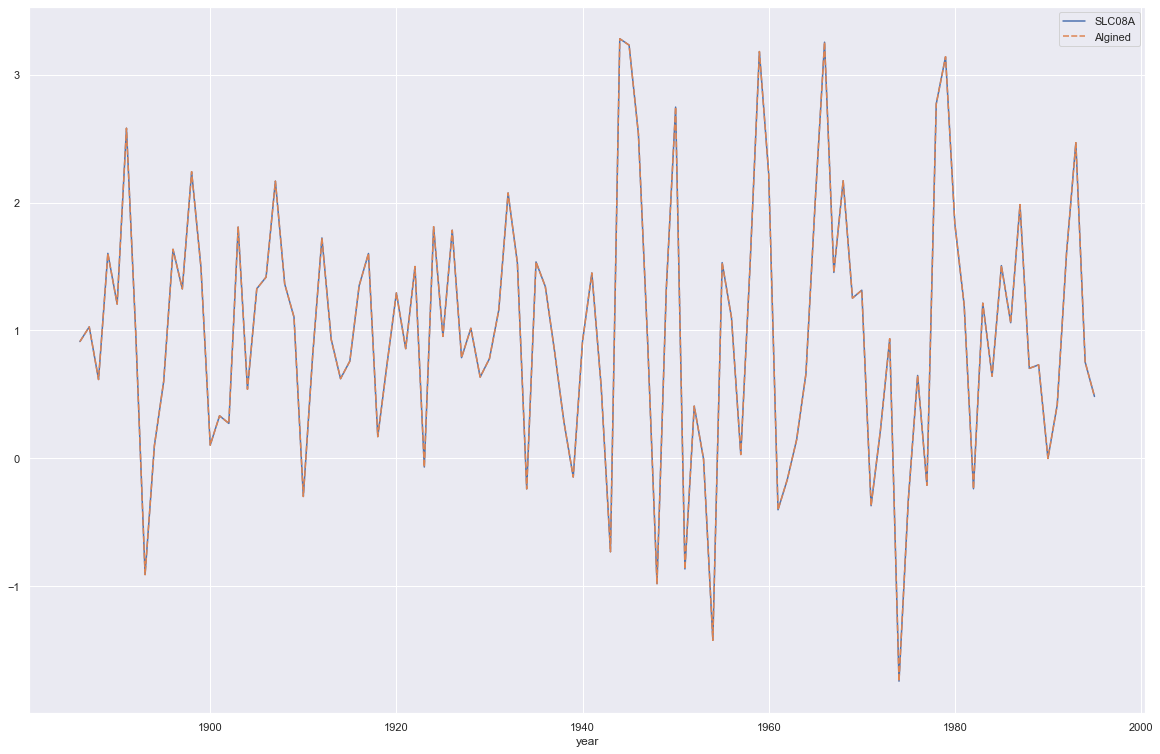

In [17]:
sns.set(rc={'figure.figsize':(20,13)})
sns.lineplot(data=df[["SLC08A",'Algined']])

<AxesSubplot:xlabel='year'>

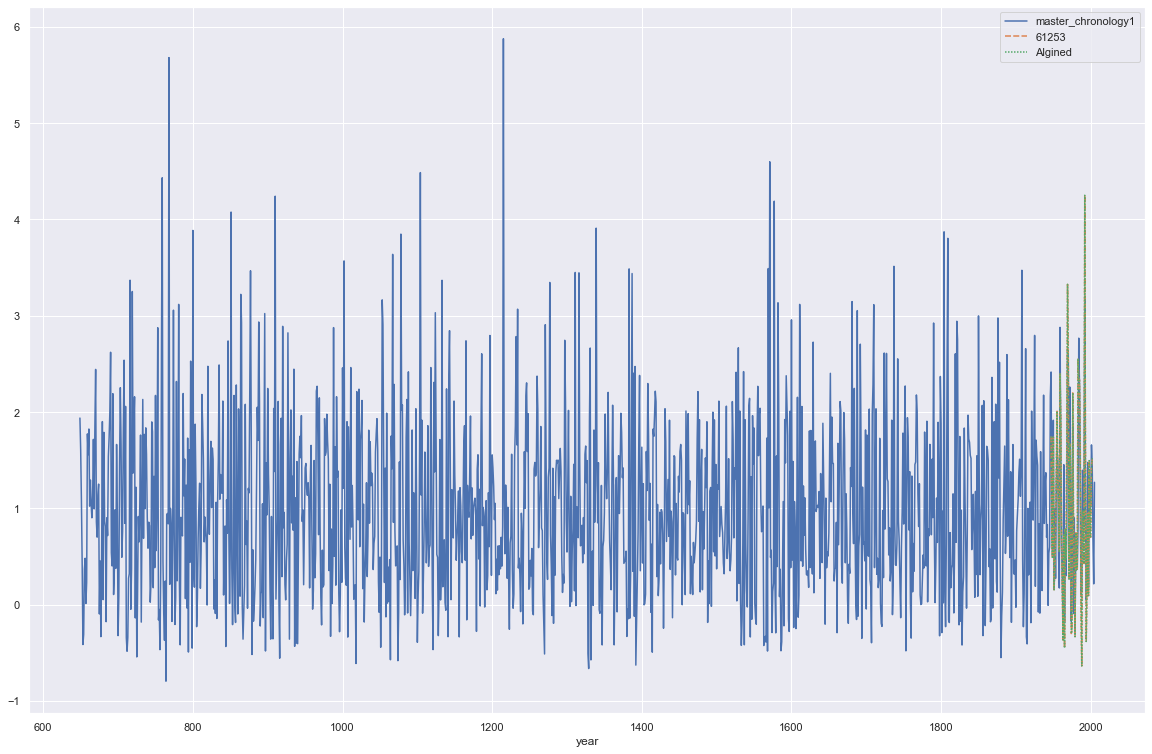

In [378]:
sns.set(rc={'figure.figsize':(20,13)})
sns.lineplot(data=df[["master_chronology1","61253",'Algined']])

# Large Sections Statistical method

In [369]:
large_segments = {}

size = len(samples[1])
step = 1
length = len(samples)
for j in range(length):
    large_segments[j] = ([samples[j][i : i + size] for i in range(0, len(samples[j]), step)])
    j+=1


for i in range(len(large_segments)):
    for j in range(len(large_segments[i][j])):
        if len(large_segments[i][j]) != size:
            print(large_segments[i][j])
            large_segments[i][j].delete()
            j+=1
    i+=1
    


In [370]:
master_segments1 = large_segments[0]
sample_segments1 = large_segments[1]
large_pairs =  [(x,y) for x in master_segments1 for y in sample_segments1]
print(len(large_pairs))

69207


In [371]:
import scipy.stats
large_t_vals = {}
for i in range(len(large_pairs)):
    (seg1, seg2) = large_pairs[i]
    if len(seg1) == len(seg2) == len(samples[1]):
        r = scipy.stats.pearsonr(seg1, seg2)[0]
        n = min(len(seg1), len(seg2))
        t = (r * (np.sqrt(n - 2)) / (np.sqrt(1 - (r * r))))
        large_t_vals[t] = (seg1,seg2)
print(len(large_pairs))
print(len(large_t_vals))
large_t_vals.keys()

69207
1307


dict_keys([0.4841641780117873, -1.2718801654899783, 0.8895101716997086, 1.5315879619389297, 0.5480330845375504, 0.9266239593413331, 0.3730311726399163, -0.037883359153204475, 0.19322751137015468, -0.42764665292474974, -1.744938726586622, -0.8262959488577605, -1.7317223120946628, -0.703494026315015, 1.9137788216041784, 1.1611836723037154, -0.29804654455030044, 0.1963129707017325, -2.563933419370817, 0.9459267072649629, 1.5713048010836557, 0.6472433147951517, 1.3301777633097467, -0.4564398684289566, -1.2460156450685704, 0.06541538040712433, 0.1926246895155103, -1.4697726743408102, 0.3610062399498754, -0.5677962854999264, -1.2372014249267649, 0.44710207992728385, 0.24390874209739072, 0.7133737278086306, 0.6988046251744615, -0.6673105181726652, 0.9162410239760822, 0.5518876317294558, -0.08219293267780371, 0.10496505093049306, 1.130579147153953, -0.3571198008789089, 0.08096650404525348, -1.087570744417426, -2.3021661932755157, 0.13671148302966124, 0.4573960012663285, -1.7652679797562143, 0.

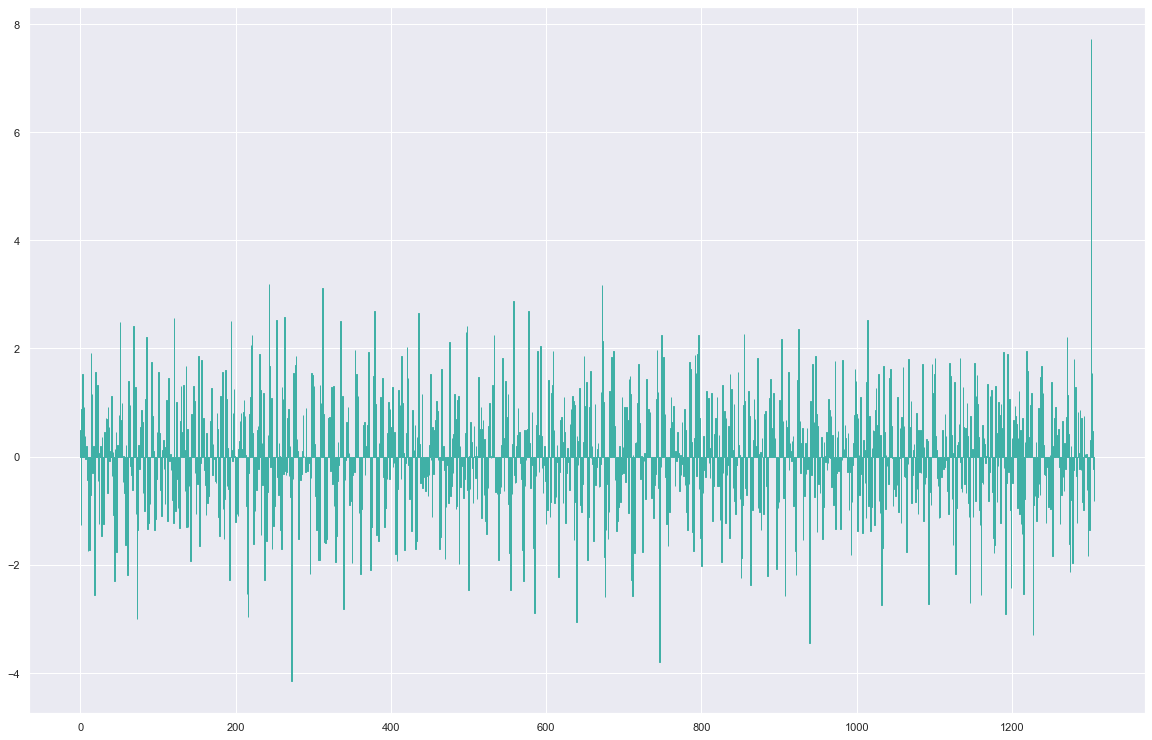

In [372]:
large_values = list(large_t_vals.keys())
sns.set(rc={'figure.figsize':(20,13)})
plt.bar( list(range(len(large_values))), large_values, color=["#40B0A6"],  edgecolor='#40B0A6')
plt.show()

In [373]:
n = len(samples[1])
endlist = [[] for _ in range(n)]
for index, item in enumerate(large_values):
    endlist[index % n].append(item)
print(endlist)

large_std = np.std(large_values)
large_mean = np.mean(large_values)
print(large_mean)
large_out_up = large_mean+2*large_std
print(large_out_up)
large_out_down = large_mean-2*large_std
print(large_out_down)
large_outlying = []
for x in range(len(large_values)):
    if large_values[x] >= large_out_up or large_values[x] <= large_out_down: 
        large_outlying.append(large_values[x])
print(large_outlying)

#Find the length of the list of pairs for the sample list
#Make sure all the lists of length less than 10 are deleted 
#Collect the t values with a loop using a gap of the list length + 1 and then adding one
#Find the highest 3 lists with the most consistant high t values
#Check these t values are actually statisically signinficant
#Add the padding and place the chronologies into the dataframe



large_max_outlying = (max(large_outlying, key=abs))
print(large_max_outlying)

[[0.4841641780117873, 2.481220434386138, 0.43272335973661724, -0.44507131716243997, 0.13366641763137133, -0.7147587049690285, -0.8771484173785604, 0.8055417170347794, -1.9204087618259393, 1.037999856819279, 0.19798847967698982, -0.4672565149512258, -0.5803339077942906, 0.9790281898965961, -1.7830210147361762, 0.027632387624658812, -0.5392799750123624, 0.3110793140197687, 0.38761859629090156, 0.39336152795864515, 0.16683462251424463, -0.8509185544698846, 0.4026790134210268, 0.19622903554575824, 0.9533240973477928, -2.1379603690231894], [-1.2718801654899783, 0.6749468516330389, -0.6134390921038378, -1.6500328870966885, 0.2851170613639201, 0.2574913911941956, -1.9031882079314666, 1.122312297759694, -0.5892828648218612, 0.8369151161040194, -0.7857667815234242, 0.19679504545949555, -0.743418844992709, -0.5168349084526406, 0.2542312705465667, -0.5433398016228136, 0.41169569844710047, 1.0629257655756323, -0.9111206079432986, -0.8932025118951757, 0.4882888627550636, -0.34109828013541516, -0.78

In [374]:
(master_seg1, sample_seg1) = large_t_vals[large_max_outlying]
print(master_seg1, sample_seg1)
#Would need to check both lists are sequential for the entire segment 
print(samples[0].index(master_seg1[0]))
print(samples[0].index(master_seg1[1]))
print(samples[1].index(sample_seg1[0]))
print(samples[1].index(sample_seg1[1]))


[0.157856264, 0.994870381, 0.27149899, 1.226489039, 1.597437024, 1.475668069, 0.509919073, 0.17176143, 2.878813758, 1.53605392, 0.58913451, 0.282591306, -0.177122377, 1.452272042, -0.189524253, 0.762222409, 0.299306232, 0.855830851, 2.643632999, 2.528113969, 0.534313446, 2.25967243, 1.26976055, -0.174321338, 0.7574617, 1.88252025, -0.093678678, 0.900529967, -0.303256613, 0.642253076, 0.361474848, 0.372973326, 0.806538715, 2.766661367, 2.254032845, 1.282305812, 0.104664617, 0.166462045, 1.394677935, 1.20175918, 0.810010639, 3.20048871, 1.00000635, 0.051581377, 0.389166981, 1.475974643, 0.185010428, 1.322578743, 0.971332156, 1.034463934, 1.657925393] [0.310220392, 0.928430957, 0.684413175, 1.854692208, 1.946739808, 0.840538477, 0.541679722, 0.408186869, 3.566220902, 0.735574015, 0.630536811, 1.237153945, -0.433130503, 0.304567569, -0.472558446, 1.965059237, 1.099138998, 1.878328707, 3.109796302, 2.587584637, 0.179257109, 0.570400002, 0.86565129, -0.584546651, 0.149857428, 2.059977802, 0.

In [375]:
samples[0].index(master_seg1[0]) - samples[1].index(sample_seg1[0])


1302

In [376]:
#Fix the padding issues (Think i may have cracked it)
#Need a way not to hard code the column names in 
indices = np.where(df["master_chronology1"] == master_seg1[0])

print(indices)

print(samples[1].index(sample_seg1[0]))
start = indices[0]-samples[1].index(sample_seg1[0])
print("start",start)
print("Legth",len(samples[1]))
beginning = df.index[0]
print("Beginning",beginning)
ending = df.index[-1]
print("Ending", ending)
padding = start[0]
padding_end = len(df.index) - (padding + len(samples[1])) 
print("Padding",padding)
print(1283-649)
print(padding_end)
chronology = []
for i in range(padding):
    chronology.append(None)
    i+=1
for j in range(len(samples[1])):
    chronology.append(samples[1][j])
    j+=1
if padding_end > 0 :
    for k in range(padding_end):
        chronology.append(None)
        k+=1
else:
    deletion = int(len(chronology)-(ending-beginning))-1
    print("Deletion", deletion)
    for x in range(deletion):
        chronology.pop()
        x+=1
    
#if len(chronology) > (ending-beginning):
   # print("Length", (ending-beginning))
    #deletion = int(len(chronology)-(ending-beginning))
   # print("Deletion", deletion)
    #for x in range(deletion-1):
      #  chronology.pop()
       # x+=1
print(chronology)

df['Large_Algined']= chronology


(array([1302]),)
0
start [1302]
Legth 51
Beginning 649
Ending 2005
Padding 1302
634
4
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, N

In [378]:
df.head()

master_chronology1  61251  Algined  Algined2  Large_Algined
year                                                             
649             1.936838    NaN      NaN       NaN            NaN
650             1.605328    NaN      NaN       NaN            NaN
651             1.079118    NaN      NaN       NaN            NaN
652             0.424857    NaN      NaN       NaN            NaN
653            -0.415379    NaN      NaN       NaN            NaN

<AxesSubplot:xlabel='year'>

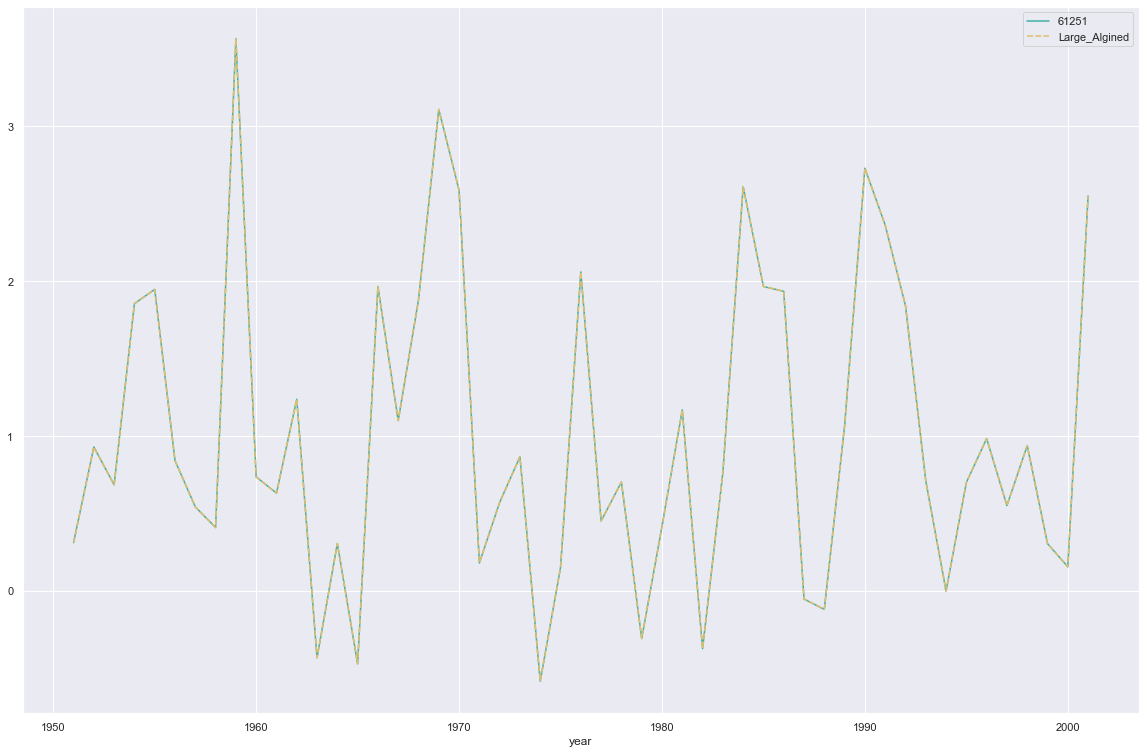

In [379]:
sns.set(rc={'figure.figsize':(20,13)})
sns.lineplot(data=df[["61251",'Large_Algined']], palette=["#40B0A6","#E1BE6A"])

In [413]:
sns.set_style('whitegrid')

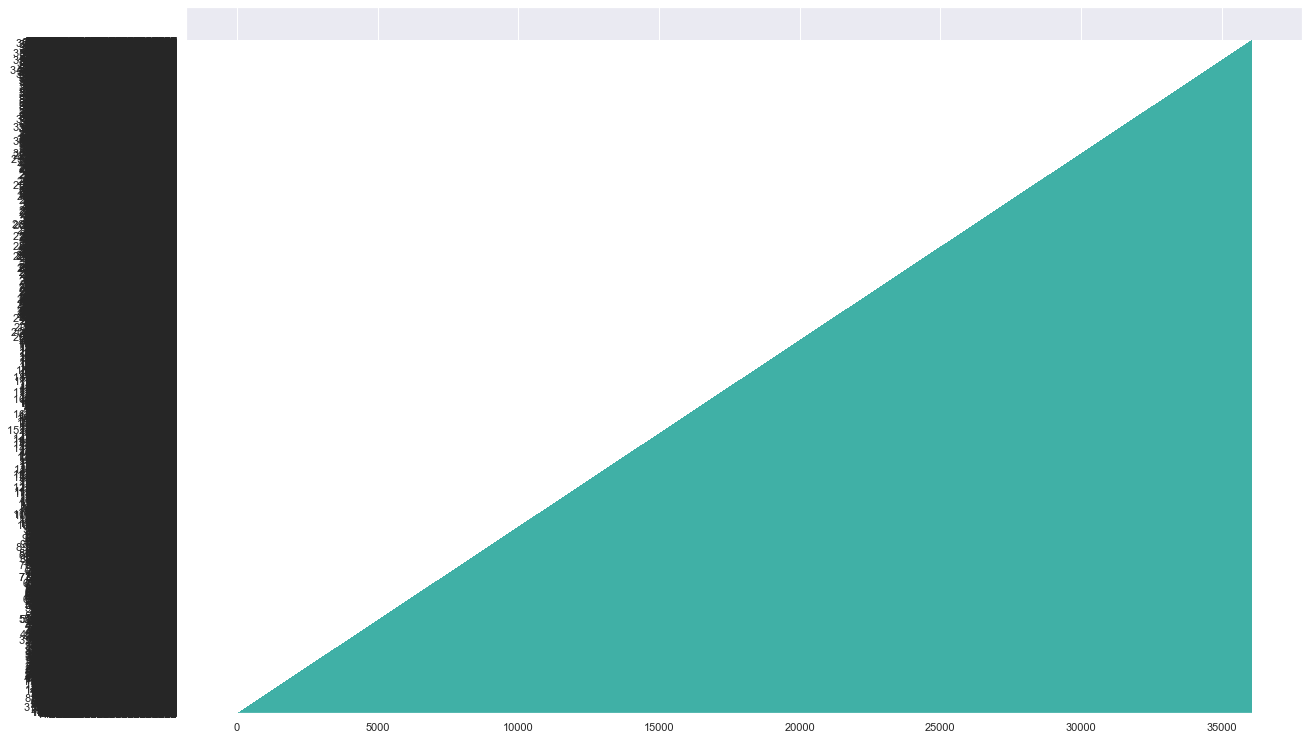

In [89]:
values = list(t_vals.keys())
sns.set(rc={'figure.figsize':(20,13)})
plt.bar(list(range(len(values))), values, color=["#40B0A6"],  edgecolor='#40B0A6')
plt.show()

In [37]:
df.head()

master_chronology3  61252
year                           
649             1.936838    NaN
650             1.605328    NaN
651             1.079118    NaN
652             0.424857    NaN
653            -0.415379    NaN

In [31]:
plt.rcParams['figure.dpi'] = 600

In [45]:
sns.set(rc={'figure.figsize':(30,13)})
sns.lineplot(data=df[["master_chronology3","61252"]].iloc[1260:],palette=["#40B0A6","#E1BE6A"], linewidth=3.5)
plt.legend(['master chronology', 'sample'], fontsize=20)
plt.ylabel('Detrended ring width value', fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.xlabel('Year', fontsize=25)
plt.title("Detrended values of a master chronology and a sample between the years of 1910 and 2020.", fontsize=25)

plt.savefig('master_sample1.png')

# Experiments with variables

In [11]:
#Helper method: Splitting an array into even sized chunks with a given overlap. (Using lists of lists and dictionaries.)

segments = {}

size = 5
step = 1
length = len(samples)
for j in range(length):
    segments[j] = ([samples[j][i : i + size] for i in range(0, len(samples[j]), step)])
    j+=1
#print(segments[0])
#print(segments[1])

short = []

for i in range(len(segments)):
    for j in range(len(segments[i])):
        if len(segments[i][j]) != size:
            #print(segments[i][j])
            short.append(segments[i][j])
            j+=1
        else:
            continue
    i+=1

#print(short)
segments0 = [x for x in segments[0] if x not in short]
segments1 = [x for x in segments[1] if x not in short]
    
#print(segments0)

segments[0] = segments0
segments[1] = segments1
segments[0][-1]
assert len(segments[0][-1]) == size
assert len(segments[1][-1]) == size
print(len(segments[1]))
master_segments = segments[0]
sample_segments = segments[1]
pairs =  [(x,y) for x in master_segments for y in sample_segments]

import scipy.stats
t_vals = {}
for i in range(len(pairs)):
    (seg1, seg2) = pairs[i]
    if len(seg1) == len(seg2) == size:
        r = np.corrcoef(seg1, seg2)[1,0]
        n = min(len(seg1), len(seg2))
        t = (r * (np.sqrt(n - 2)) / (np.sqrt(1 - (r * r))))
        t_vals[str(i) + " " + str(t)] = (seg1,seg2)
    else: 
        print(seg1,seg2)
#print(t_vals)
#print(len(t_vals))
#t_vals.keys()

#print(outlying)

#Find the length of the list of pairs for the sample list
#Make sure all the lists of length less than 10 are deleted 
#Collect the t values with a loop using a gap of the list length + 1 and then adding one
#Find the highest 3 lists with the most consistant high t values
#Check these t values are actually statisically signinficant
#Add the padding and place the chronologies into the dataframe


values = list(t_vals.keys())
for i in range(len(values)):
    values[i] = float(values[i].split()[-1])

#print(max_list)
#print(max_val)
#print(t_values_samples)
#print(len(t_values_samples))
std = np.std(values)
mean = np.mean(values)
#print(mean)
out_up = mean+3*std
#print(out_up)
out_down = mean-3*std
#print(out_down)
outlying = []
for x in range(len(values)):
    if values[x] >= out_up or values[x] <= out_down: 
        outlying.append(values[x])

stri = len(segments[1])+1
x=list(map(str,outlying))
z="-".join(x)
contender = []
stride = len(segments[1]) 

print("outlying",len(outlying)) 

for y in range(len(outlying)):
    try:
        
        
        contender.append(outlying[y])
    except:
        continue 

winners = outlying.copy()

for y in range(len(outlying)):
    try:
        ind = values.index(outlying[y])
        s = ind + stri
        for i in range(7):
            if z.find(str(values[s])) == -1:
                winners.remove(outlying[y])
                continue
            else:
                s += stri
    except:
        continue
            

print(len(outlying))  
print("contender", len(contender))
print("winners", len(winners))
#print(contender)
    
max_outlying = (max(values, key=abs))
#print(values.index(max_outlying))
max_outlying = str(str(values.index(max_outlying)) + ' ' + str(max_outlying))
#print(max_outlying)
max_contender = (max(contender, key=abs))
#print(max_contender)
max_contender = str(str(values.index(max_contender)) + ' ' + str(max_contender))
#print(max_contender)
top_contenders = []
all_contenders = []
for i in range(3):
    max_contender = (max(contender, key=abs))
    contender.remove(max_contender)
    max_contender = str(values.index(max_contender)) + ' ' + str(max_contender)
    top_contenders.append(max_contender)
    i+=1
#print(top_contenders)
for i in range(len(winners)):
    all_contenders.append(str(values.index(winners[i])) + ' ' + str(winners[i]))
    
(master_seg, sample_seg) = t_vals[top_contenders[0]]
#print(master_seg, sample_seg)
#Would need to check both lists are sequential for the entire segment 
#print(samples[0].index(master_seg[0]))
#print(samples[0].index(master_seg[1]))
#print(samples[1].index(sample_seg[0]))
#print(samples[1].index(sample_seg[1]))

#print(samples[0].index(master_seg[0]) - samples[1].index(sample_seg[0]))
#print(samples[0].index(master_seg1[0]) - samples[1].index(sample_seg1[0]))
#print(samples[0].index(master_seg2[0]) - samples[1].index(sample_seg2[0]))

start_year = []
for i in range (len(all_contenders)):
    (master_seg, sample_seg) = t_vals[all_contenders[i]]
    start_year.append(samples[0].index(master_seg[0]) - samples[1].index(sample_seg[0]))

from collections import Counter

start_year_dic = Counter(start_year)
start_year_count = len(start_year)
print(start_year_dic)
(master_seg, sample_seg) = t_vals[top_contenders[0]]
#Fix the padding issues (Think i may have cracked it)
#Need a way not to hard code the column names in 
indices = np.where(df["master_chronology"] == master_seg[0])
#print(indices)

#print(samples[1].index(sample_seg[0]))
start = indices[0]-samples[1].index(sample_seg[0])
print("start",start)
print("Start year", start_year_dic.most_common(1)[0][0])
#print("Legth",len(samples[1]))
beginning = df.index[0]
#print("Beginning",beginning)
ending = df.index[-1]
#print("Ending", ending)
padding = start[0]
padding_end = len(df.index) - (padding + len(samples[1])) 
#print("Padding",padding)
#print(1283-649)
#print(padding_end)
chronology = []
for i in range(padding):
    chronology.append(None)
    i+=1
for j in range(len(samples[1])):
    chronology.append(samples[1][j])
    j+=1
if padding_end > 0 :
    for k in range(padding_end):
        chronology.append(None)
        k+=1
else:
    deletion = int(len(chronology)-(ending-beginning))-1
    #print("Deletion", deletion)
    for x in range(deletion):
        chronology.pop()
        x+=1
#print(chronology)

df['Algined']= chronology


106
outlying 459
459
contender 459
winners 2
Counter({347: 2})
start [105]
Start year 347


In [61]:
samples = []
top_contenders = []
all_contenders = []
i= 0
for col in df.columns:
    col_list = df[col].tolist()
    cleanedList = [x for x in col_list if x == x]
    samples.append(cleanedList)
#print(samples)
#print(len(samples))
#print(len(samples[1]))  
segments = {}

size = 10
step = 1
length = len(samples)
for j in range(length):
    segments[j] = ([samples[j][i : i + size] for i in range(0, len(samples[j]), step)])
    j+=1
#print(segments[0])
#print(segments[1])

short = []

for i in range(len(segments)):
    for j in range(len(segments[i])):
        if len(segments[i][j]) != size:
            #print(segments[i][j])
            short.append(segments[i][j])
            j+=1
        else:
            continue
    i+=1

#print(short)
segments0 = [x for x in segments[0] if x not in short]
segments1 = [x for x in segments[1] if x not in short]
    
#print(segments0)

segments[0] = segments0
segments[1] = segments1
segments[0][-1]
assert len(segments[0][-1]) == size
assert len(segments[1][-1]) == size
print(len(segments[1]))
master_segments = segments[0]
sample_segments = segments[1]
pairs =  [(x,y) for x in master_segments for y in sample_segments]

import scipy.stats
t_vals = {}
for i in range(len(pairs)):
    (seg1, seg2) = pairs[i]
    if len(seg1) == len(seg2) == size:
        r = np.corrcoef(seg1, seg2)[1,0]
        n = min(len(seg1), len(seg2))
        t = (r * (np.sqrt(n - 2)) / (np.sqrt(1 - (r * r))))
        t_vals[str(i) + " " + str(t)] = (seg1,seg2)
    else: 
        print(seg1,seg2)
#print(t_vals)
#print(len(t_vals))
#t_vals.keys()

#print(outlying)

#Find the length of the list of pairs for the sample list
#Make sure all the lists of length less than 10 are deleted 
#Collect the t values with a loop using a gap of the list length + 1 and then adding one
#Find the highest 3 lists with the most consistant high t values
#Check these t values are actually statisically signinficant
#Add the padding and place the chronologies into the dataframe


values = list(t_vals.keys())
for i in range(len(values)):
    values[i] = float(values[i].split()[-1])

#print(max_list)
#print(max_val)
#print(t_values_samples)
#print(len(t_values_samples))
std = np.std(values)
mean = np.mean(values)
#print(mean)
out_up = mean+3*std
#print(out_up)
out_down = mean-3*std
#print(out_down)
outlying = []
for x in range(len(values)):
    if values[x] >= out_up or values[x] <= out_down: 
        outlying.append(values[x])

stri = len(segments[1])+1
x=list(map(str,outlying))
z="-".join(x)
contender = outlying.copy()
stride = len(segments[1]) 

#print(outlying) 

for y in range(len(outlying)):
    try:
        ind = values.index(outlying[y])
        s = ind + stri
        for i in range(0):
            #print(s)
            if z.find(str(values[s])) == -1:
                contender.remove(outlying[y])
                break
            else:
                s += stri
    except:
        continue
            


#print(len(outlying))  
print(len(contender))
print(contender)
for i in range(len(contender)):
    all_contenders.append(str(values.index(contender[i])) + ' ' + str(contender[i]))
max_outlying = (max(values, key=abs))
#print(values.index(max_outlying))
max_outlying = str(str(values.index(max_outlying)) + ' ' + str(max_outlying))
#print(max_outlying)
max_contender = (max(contender, key=abs))
#print(max_contender)
max_contender = str(str(values.index(max_contender)) + ' ' + str(max_contender))
#print(max_contender)

#for i in range(3):
#    max_contender = (max(contender, key=abs))
#    contender.remove(max_contender)
#    max_contender = str(values.index(max_contender)) + ' ' + str(max_contender)
#    top_contenders.append(max_contender)
#    i+=1
#print(top_contenders)
for i in range(len(contender)):
    all_contenders.append(str(values.index(contender[i])) + ' ' + str(contender[i]))
    
#(master_seg, sample_seg) = t_vals[top_contenders[0]]
#print(master_seg, sample_seg)
#Would need to check both lists are sequential for the entire segment 
#print(samples[0].index(master_seg[0]))
#print(samples[0].index(master_seg[1]))
#print(samples[1].index(sample_seg[0]))
#print(samples[1].index(sample_seg[1]))

#print(samples[0].index(master_seg[0]) - samples[1].index(sample_seg[0]))
#print(samples[0].index(master_seg1[0]) - samples[1].index(sample_seg1[0]))
#print(samples[0].index(master_seg2[0]) - samples[1].index(sample_seg2[0]))

start_year = []
for i in range (len(all_contenders)):
    (master_seg, sample_seg) = t_vals[all_contenders[i]]
    start_year.append(df.first_valid_index() + samples[0].index(master_seg[0]) - samples[1].index(sample_seg[0]))

from collections import Counter

start_year_dic = Counter(start_year)
start_year_count = len(start_year)
print(start_year_dic)
print(start_year_count)
'''start_year_dic.most_common(3)
print(start_year_dic)
for i in range(len(start_year_dic.most_common(3))):
    print(i,"common",start_year_dic.most_common(3)[i][0])


#print(start_year_dic)
(master_seg, sample_seg) = t_vals[top_contenders[0]]
#Fix the padding issues (Think i may have cracked it)
#Need a way not to hard code the column names in 
indices = np.where(df["master_chronology"] == master_seg[0])
#print(indices)

#print(samples[1].index(sample_seg[0]))
start = indices[0]-samples[1].index(sample_seg[0])

#print("start",start)
#print("Legth",len(samples[1]))
beginning = df.index[0]
#print("Beginning",beginning)
ending = df.index[-1]
#print("Ending", ending)
padding = start[0]
padding_end = len(df.index) - (padding + len(samples[1])) 
#print("Padding",padding)
#print(1283-649)
#print(padding_end)
chronology = []
for i in range(padding):
    chronology.append(None)
    i+=1
for j in range(len(samples[1])):
    chronology.append(samples[1][j])
    j+=1
if padding_end > 0 :
    for k in range(padding_end):
        chronology.append(None)
        k+=1
else:
    deletion = int(len(chronology)-(ending-beginning))-1
    #print("Deletion", deletion)
    for x in range(deletion):
        chronology.pop()
        x+=1
#print(chronology)

df['Algined']= chronology'''

254
782
[4.746427640841053, 4.349975506027993, -3.7779466278149902, 4.950070962579463, 4.674777056255917, -3.8753562144555898, 4.89278912237614, -3.6933592175384793, -3.7071667857234334, -4.07003416354928, -3.7780436505434642, 3.9391811305036906, -4.893409655993484, -4.4878886760618535, 3.768528912535398, 3.960537907167266, -5.148153969956561, 3.991396887037317, -5.0051839036256816, 4.2077351710850674, 4.257194330237691, 3.9944486988576124, 3.9496413146664366, -4.7588630039065904, 3.9338201159807737, -4.27117938229757, -3.849048615658263, 3.7962977493478123, 5.1877744450424865, 4.222502688308293, -3.870316667278674, -3.827368218154015, 4.34647697603852, -5.040447695717484, 4.855950775778195, -3.8089156066656837, 8.987339777851913, 3.662433874273488, -3.949699249842869, 7.02093594507813, -3.8352457006743705, -4.293342934963299, 3.8647947379983543, 4.193153224238434, -4.104671260574737, 3.9973735028812483, 3.7980731809558996, -3.799618140301969, -3.8436076146110816, -4.0491218069833685, 

Counter({1733: 122, 1786: 28, 1776: 24, 1820: 22, 1707: 22, 1565: 20, 1713: 20, 1715: 20, 1525: 18, 1702: 18, 1661: 16, 1680: 16, 1555: 16, 1689: 16, 1758: 16, 1619: 14, 1734: 14, 1737: 14, 1826: 14, 1895: 14, 1881: 14, 1513: 12, 1474: 12, 1545: 12, 1841: 12, 1789: 12, 1727: 12, 1875: 12, 1571: 10, 1534: 10, 1546: 10, 1541: 10, 1550: 10, 1654: 10, 1508: 10, 1699: 10, 1590: 10, 1569: 10, 1529: 10, 1622: 10, 1736: 10, 1756: 10, 1822: 10, 1850: 10, 1630: 10, 1849: 10, 1828: 10, 1738: 10, 1958: 10, 1620: 8, 1582: 8, 1544: 8, 1503: 8, 1603: 8, 1572: 8, 1624: 8, 1698: 8, 1701: 8, 1547: 8, 1614: 8, 1697: 8, 1662: 8, 1584: 8, 1806: 8, 1585: 8, 1832: 8, 1855: 8, 1802: 8, 1760: 8, 1864: 8, 1872: 8, 1780: 8, 1757: 8, 1879: 8, 1769: 8, 1854: 8, 1632: 6, 1487: 6, 1483: 6, 1635: 6, 1538: 6, 1481: 6, 1561: 6, 1476: 6, 1581: 6, 1515: 6, 1507: 6, 1580: 6, 1616: 6, 1726: 6, 1691: 6, 1751: 6, 1634: 6, 1688: 6, 1558: 6, 1767: 6, 1723: 6, 1750: 6, 1777: 6, 1711: 6, 1708: 6, 1772: 6, 1835: 6, 1755: 6, 1785:

'start_year_dic.most_common(3)\nprint(start_year_dic)\nfor i in range(len(start_year_dic.most_common(3))):\n    print(i,"common",start_year_dic.most_common(3)[i][0])\n\n\n#print(start_year_dic)\n(master_seg, sample_seg) = t_vals[top_contenders[0]]\n#Fix the padding issues (Think i may have cracked it)\n#Need a way not to hard code the column names in \nindices = np.where(df["master_chronology"] == master_seg[0])\n#print(indices)\n\n#print(samples[1].index(sample_seg[0]))\nstart = indices[0]-samples[1].index(sample_seg[0])\n\n#print("start",start)\n#print("Legth",len(samples[1]))\nbeginning = df.index[0]\n#print("Beginning",beginning)\nending = df.index[-1]\n#print("Ending", ending)\npadding = start[0]\npadding_end = len(df.index) - (padding + len(samples[1])) \n#print("Padding",padding)\n#print(1283-649)\n#print(padding_end)\nchronology = []\nfor i in range(padding):\n    chronology.append(None)\n    i+=1\nfor j in range(len(samples[1])):\n    chronology.append(samples[1][j])\n    j+=1

In [62]:
df.apply(pd.Series.first_valid_index)

master_chronology    1630
SLC07A               1733
dtype: int64

Experimental data:

Changing the stride length for the contender list.

In [21]:
start_year_count = 0
start_year_dic = []

In [94]:
eight_stride_count = start_year_count
eight_stride_counter = start_year_dic

In [96]:
seven_stride_count = start_year_count
seven_stride_counter = start_year_dic

In [90]:
six_stride_count = start_year_count
six_stride_counter = start_year_dic

In [89]:
five_stride_count = start_year_count
five_stride_counter = start_year_dic

In [87]:
four_stride_count = start_year_count
four_stride_counter = start_year_dic 

In [85]:
three_stride_count = start_year_count
three_stride_counter = start_year_dic

In [83]:
two_stride_count = start_year_count
two_stride_counter = start_year_dic

In [81]:
one_stride_count = start_year_count
one_stride_counter = start_year_dic

In [79]:
zero_stride_count = start_year_count
zero_stride_counter = start_year_dic

Changing standard diviations for outliers for t values

In [135]:
three_standard_diviations = start_year_dic

In [141]:
four_standard_diviations = start_year_dic
print(four_standard_diviations)

Counter({1298: 6})


Different length samples

In [20]:
correct_count_sample_length = start_year_count
counter_sample_length = start_year_dic

In [57]:
correct_count_sample_length = start_year_count
counter_sample_length = start_year_dic

In [138]:
correct_count_5_length = start_year_count
counter_sample_5_length = start_year_dic

In [58]:
correct_count_5_length = start_year_count
counter_sample_5_length = start_year_dic

In [140]:
correct_count_10_length = start_year_count
counter_sample_10_length = start_year_dic

In [142]:
correct_count_15_length = start_year_count
counter_sample_15_length = start_year_dic

In [144]:
correct_count_20_length = start_year_count
counter_sample_20_length = start_year_dic

In [146]:
correct_count_25_length = start_year_count
counter_sample_25_length = start_year_dic

In [148]:
correct_count_30_length = start_year_count
counter_sample_30_length = start_year_dic

In [150]:
correct_count_35_length = start_year_count
counter_sample_35_length = start_year_dic

In [152]:
correct_count_40_length = start_year_count
counter_sample_40_length = start_year_dic

In [86]:
print(counter_sample_40_length)

Counter({1886: 68, 1581: 17, 1627: 13, 1947: 7, 1666: 6, 1661: 6, 1665: 5, 1883: 4, 1668: 3, 1783: 2, 1919: 2, 1800: 1})


In [208]:
correct_count_1_dev = start_year_count
correct_count_1_dev = start_year_dic

In [210]:
counter_sample_2_dev = start_year_count
correct_count_2_dev = start_year_dic

In [212]:
counter_sample_3_dev = start_year_count
correct_count_3_dev = start_year_dic

In [164]:
counter_sample_4_dev = start_year_count
correct_count_4_dev = start_year_dic

In [166]:
counter_sample_5_dev = start_year_count
correct_count_5_dev = start_year_dic

In [ ]:
counter_sample_6_dev = start_year_count
correct_count_6_dev = start_year_dic

In [ ]:
counter_sample_7_dev = start_year_count
correct_count_7_dev = start_year_dic

In [ ]:
counter_sample_1_dev = start_year_count
correct_count_1_dev = start_year_dic

# print(eight_stride_counter)

<function matplotlib.pyplot.show(close=None, block=None)>

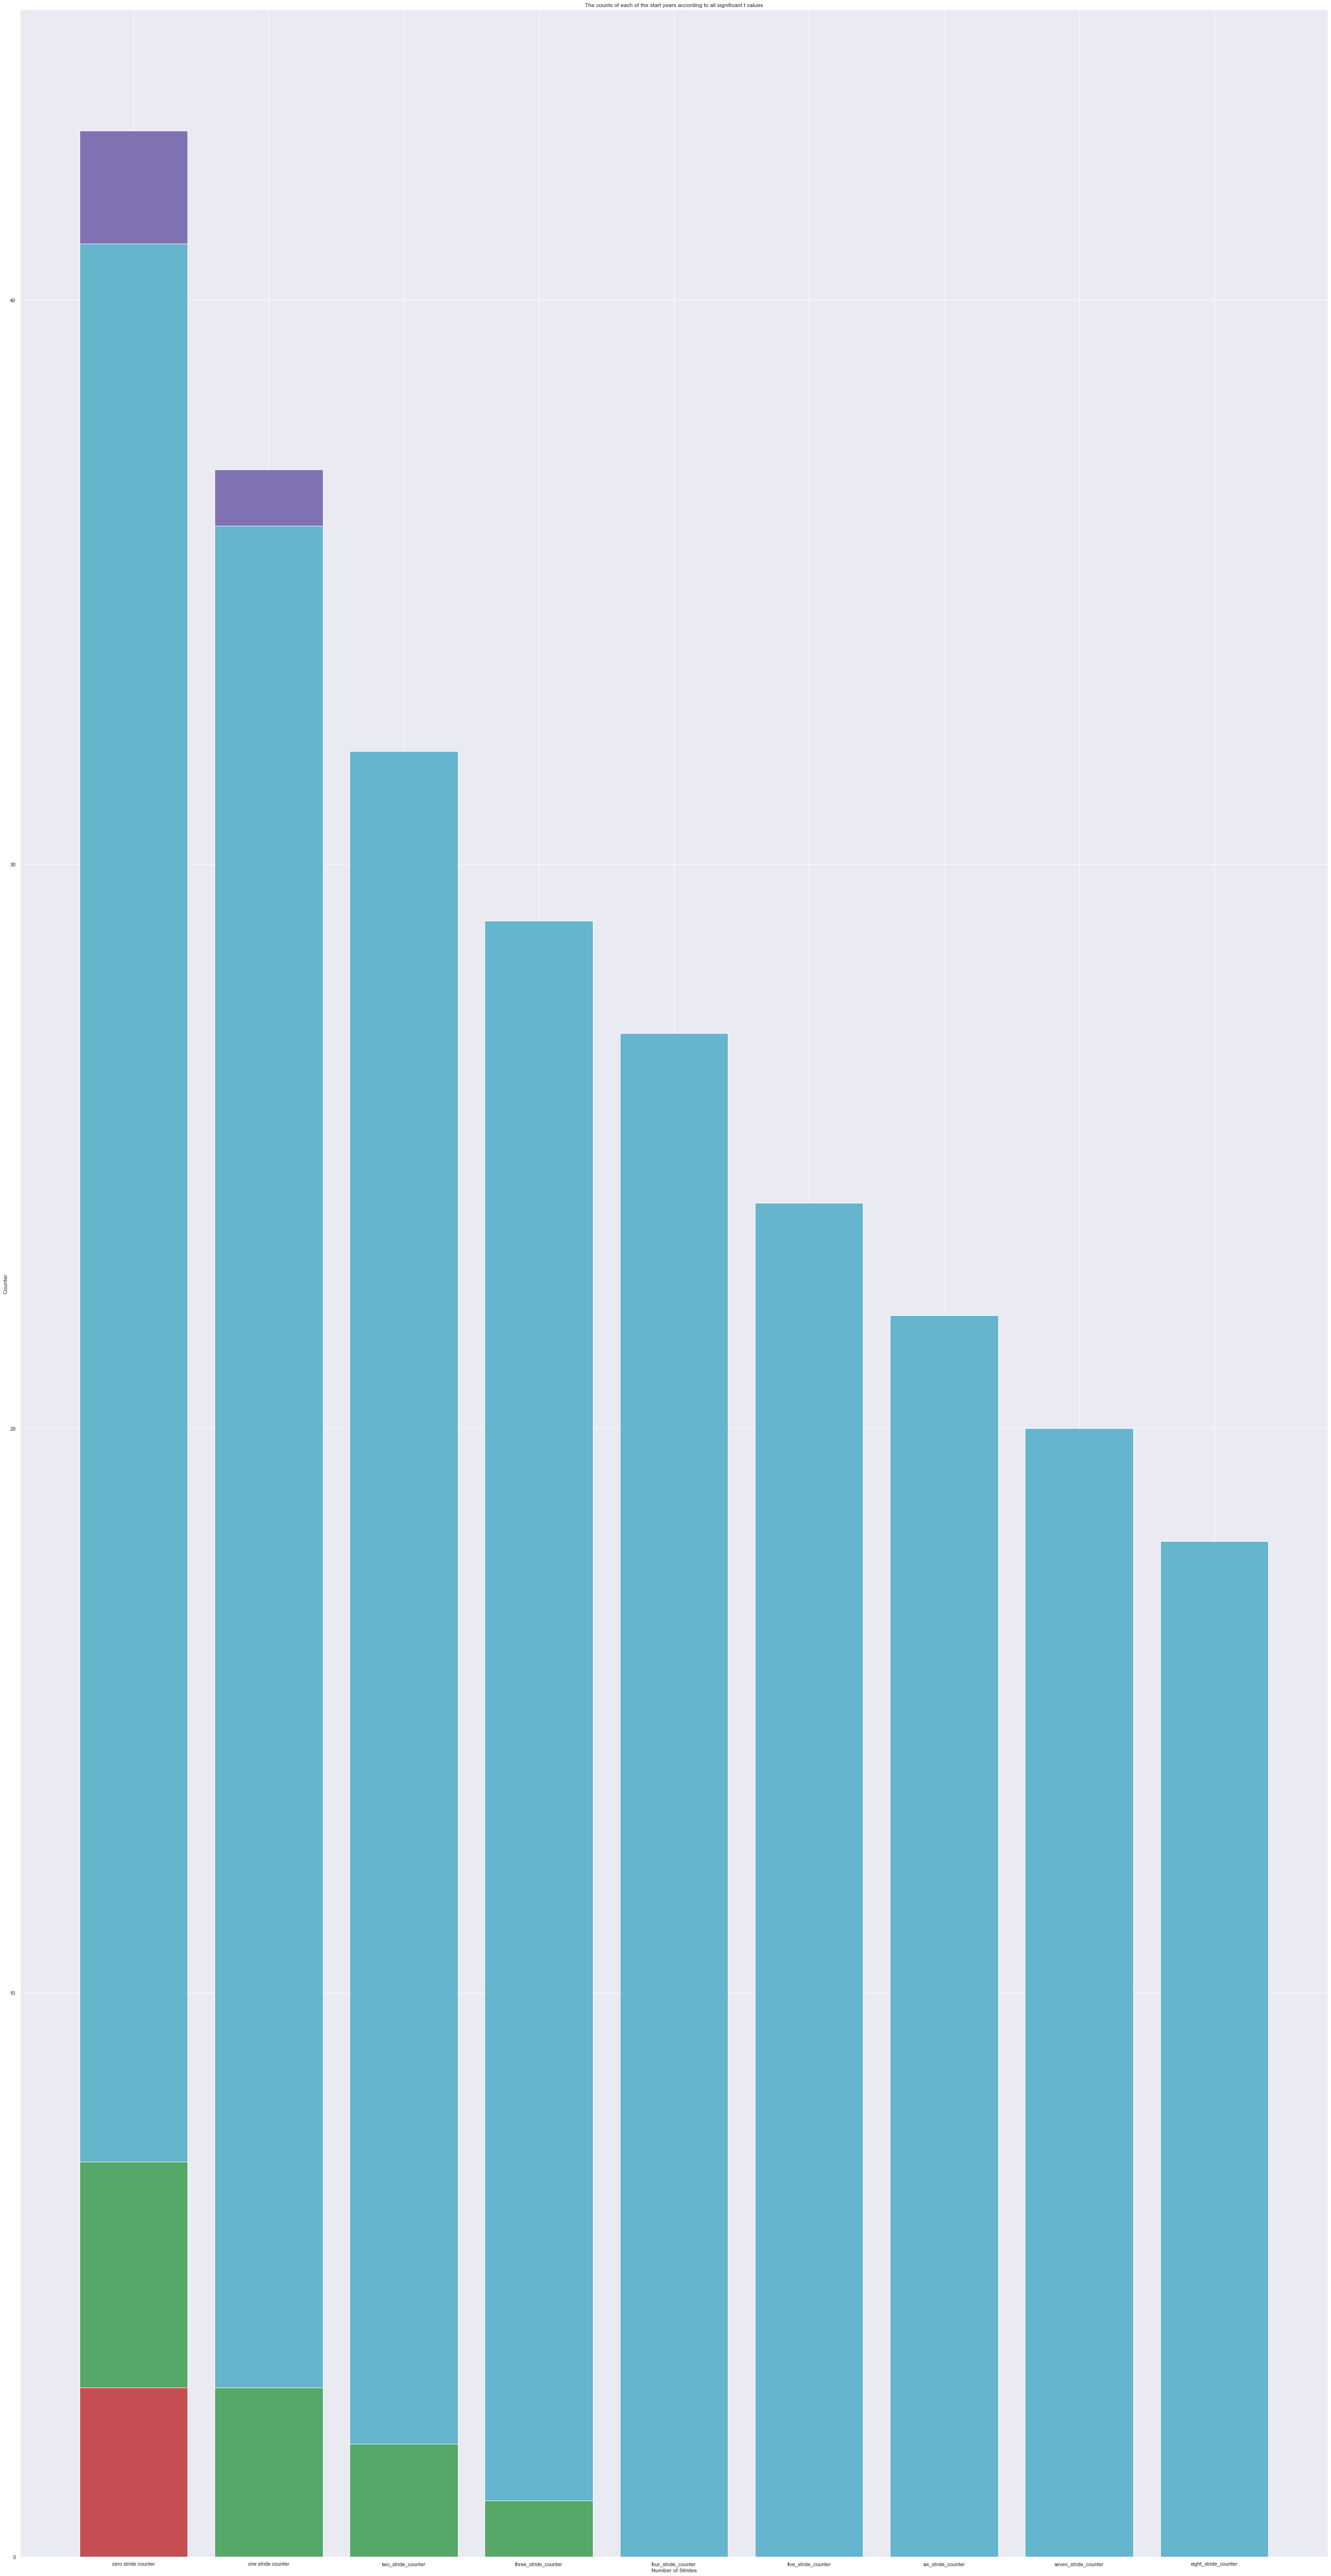

In [101]:
# create data
x = ['zero stride counter', 'one stride counter', 'two_stride_counter', 'three_stride_counter', 'four_stride_counter', 'five_stride_counter', 'six_stride_counter', 'seven_stride_counter', 'eight_stride_counter'  ]
y1 = np.array(zero_stride_counter.values())
y2 = np.array(one_stride_counter.values())
y3 = np.array(two_stride_counter.values())
y4 = np.array(three_stride_counter.values())
y5 = np.array(four_stride_counter.values())
 
    
#Need to get lists of each count 
legend_list = []
counter_list = []
for i in range(len(list(zero_stride_counter.values()))):
    legend_list.append(list(zero_stride_counter.keys())[i])
    
#for i in range(len(legend_list)):
    
# plot bars in stack manner
for i in range(len(legend_list)):
    counter_list.append([zero_stride_counter[legend_list[i]], one_stride_counter[legend_list[i]], two_stride_counter[legend_list[i]], three_stride_counter[legend_list[i]], four_stride_counter[legend_list[i]], five_stride_counter[legend_list[i]], six_stride_counter[legend_list[i]], seven_stride_counter[legend_list[i]], eight_stride_counter[legend_list[i]]])
    i+=1

correct = [zero_stride_counter[1298], one_stride_counter[1298], two_stride_counter[1298], three_stride_counter[1298], four_stride_counter[1298], five_stride_counter[1298], six_stride_counter[1298], seven_stride_counter[1298], eight_stride_counter[1298]]
total = [zero_stride_count, one_stride_count, two_stride_count, three_stride_count, four_stride_count, five_stride_count, six_stride_count, seven_stride_count, eight_stride_count]
incorrect = [element1 - element2 for (element1, element2) in zip(total, correct)]

plt.bar(x, counter_list[0], color='r')
plt.bar(x, counter_list[1], bottom= counter_list[0], color='b')

color_list = ['r', 'g', 'b', 'y', 'c', 'm']
beginning = counter_list[1]
for i in range(len(counter_list)-2):
    bottom_list = [x + y for x, y in zip(beginning, counter_list[i+1])]
    plt.bar(x, counter_list[i+2], bottom = bottom_list, color = color_list[i%6]) 
sns.set(rc={'figure.figsize':(50,100)})
plt.xlabel("Number of Strides")
plt.ylabel("Counter")



plt.title("The counts of each of the start years according to all significant t values")

plt.show


In [173]:
correct = [zero_stride_counter[1310], one_stride_counter[1310], two_stride_counter[1310], three_stride_counter[1310], four_stride_counter[1310], five_stride_counter[1310], six_stride_counter[1310], seven_stride_counter[1310], eight_stride_counter[1310]]
total = [zero_stride_count, one_stride_count, two_stride_count, three_stride_count, four_stride_count, five_stride_count, six_stride_count, seven_stride_count, eight_stride_count]
incorrect = [element1 - element2 for (element1, element2) in zip(total, correct)]

print(correct)
print(incorrect)
print(total)

[20, 16, 13, 11, 9, 7, 7, 6, 1]
[360, 155, 67, 26, 12, 5, 5, 1, 0]
[380, 171, 80, 37, 21, 12, 12, 7, 1]


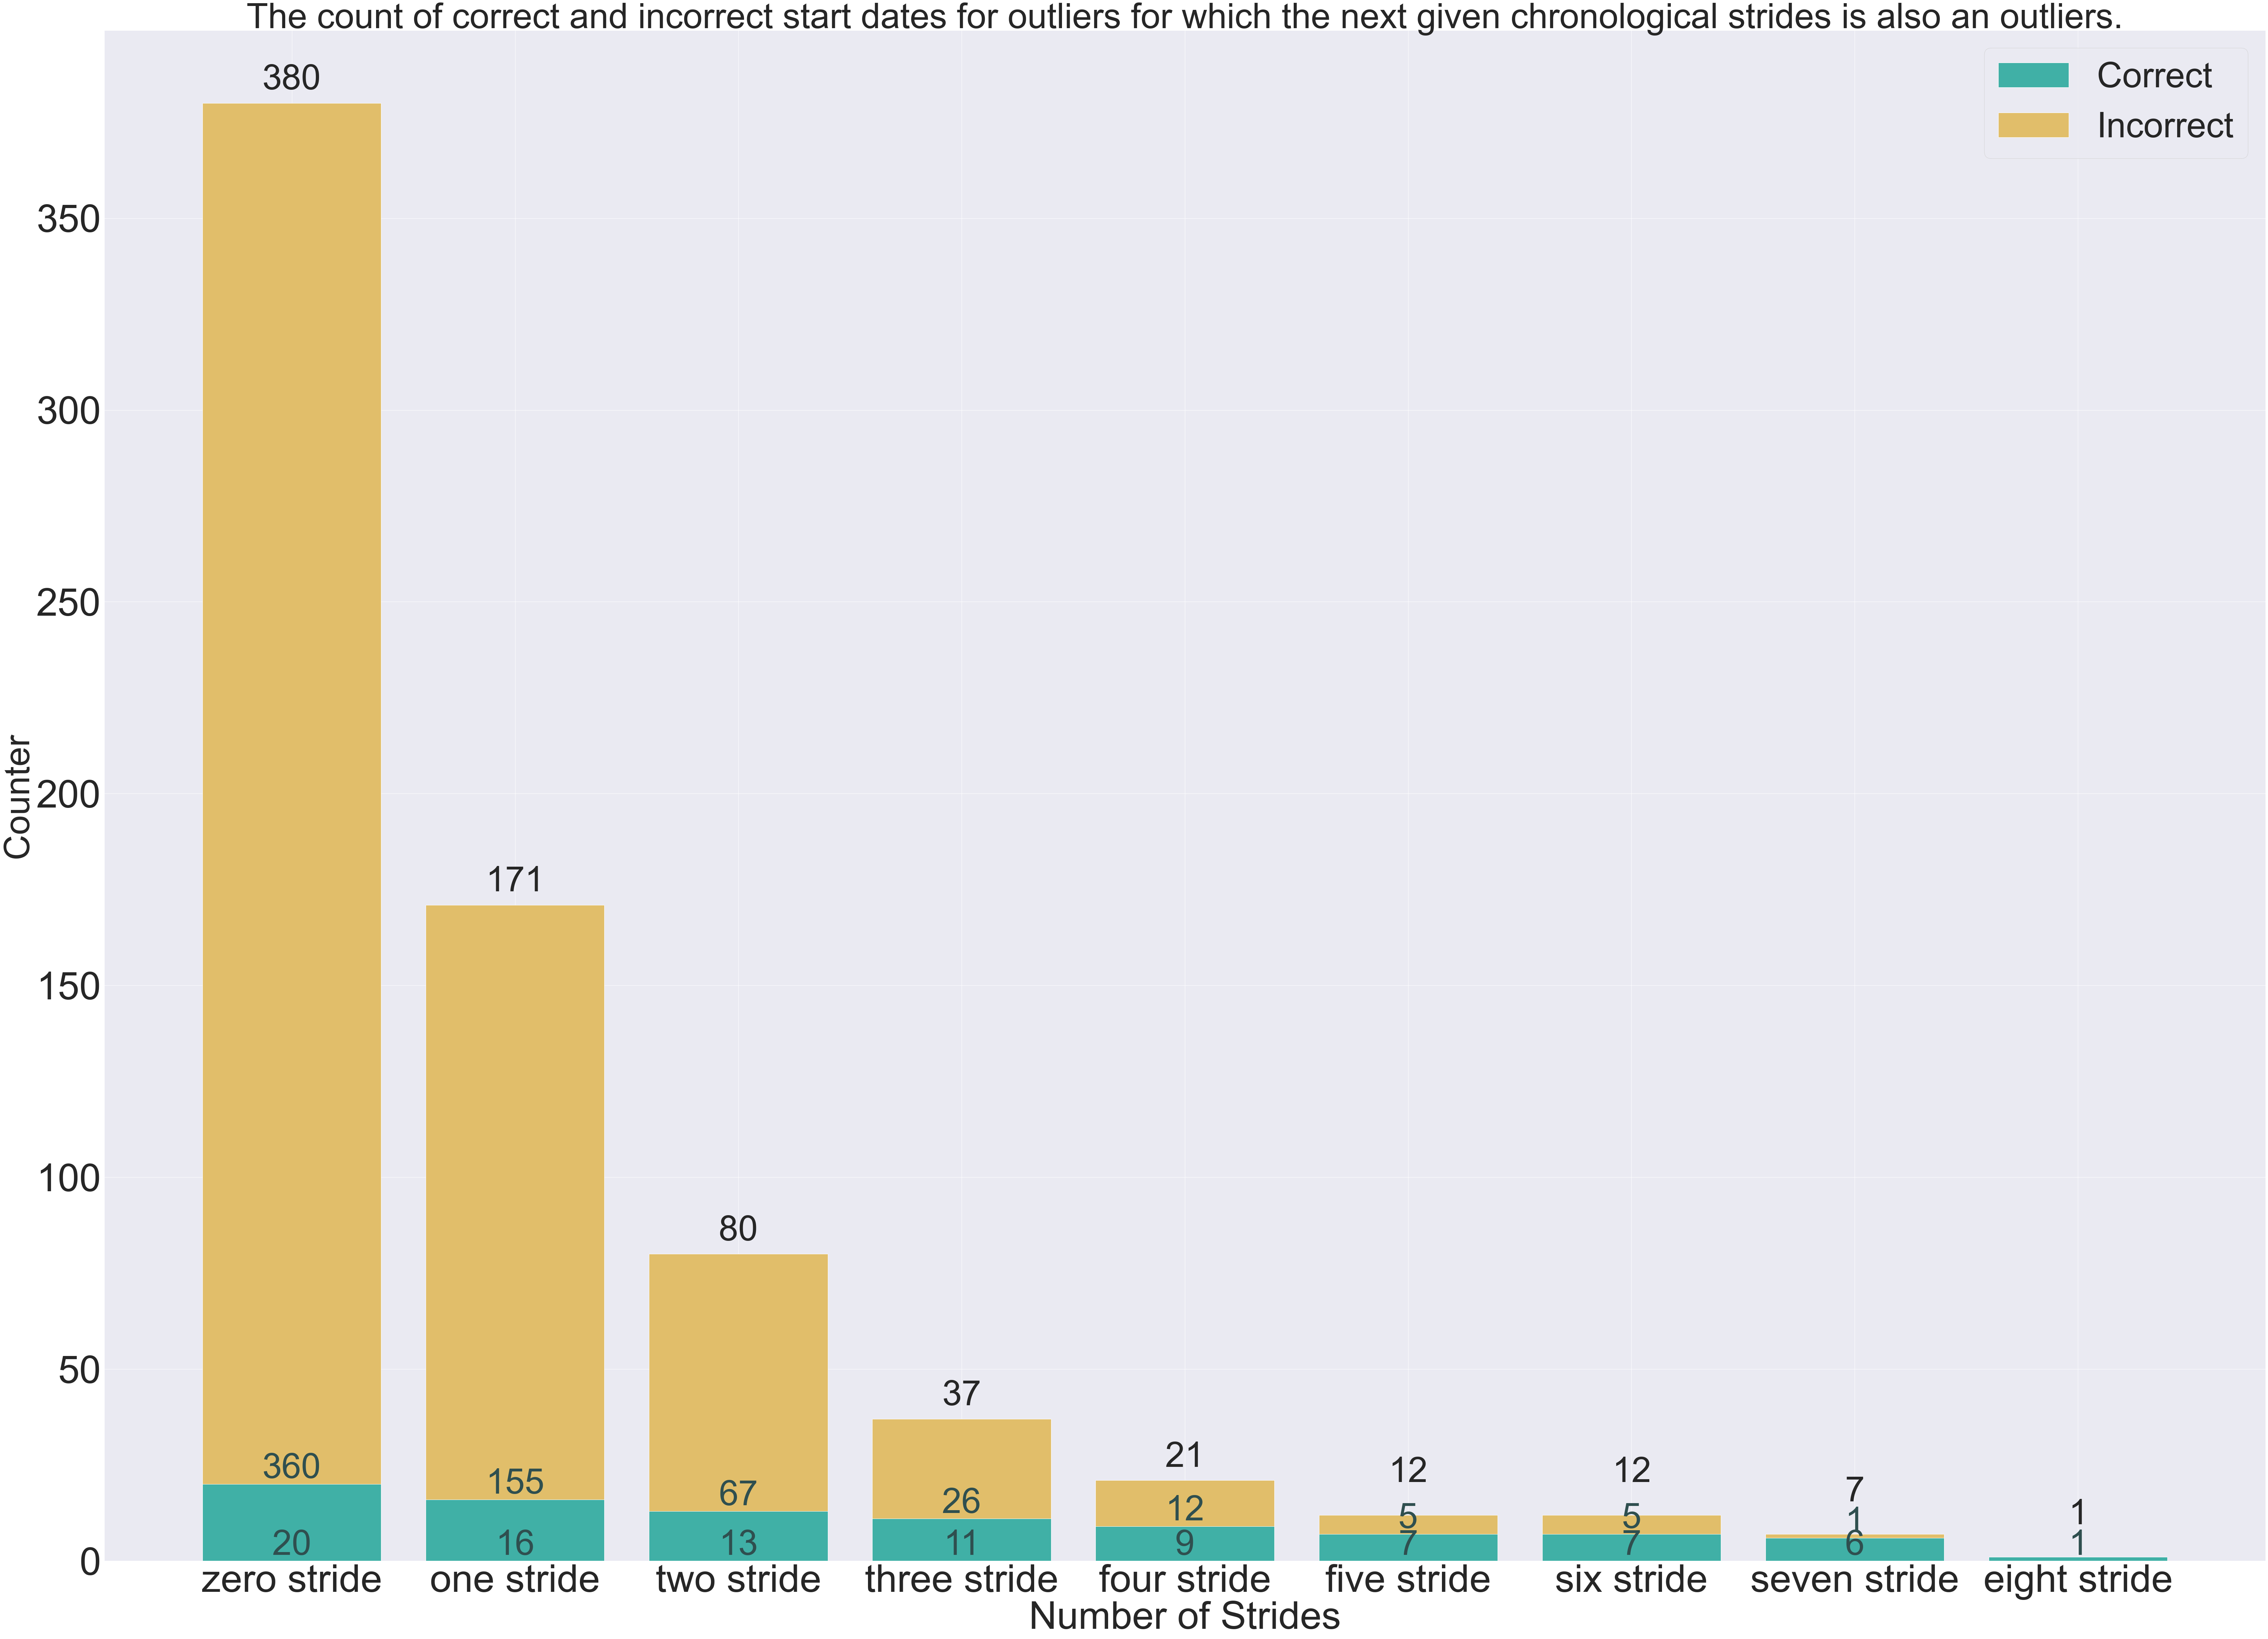

In [174]:
fig, ax = plt.subplots()
x = ['1', '2', '3', '4', '5', '6', '7', '8', '9'  ]
plt.bar(x, correct, color='#40B0A6')
plt.bar(x, incorrect, bottom= correct, color='#E1BE6A')

plt.xlabel("Number of Strides", fontsize=110)
plt.ylabel("Counter",fontsize=100)

sns.set(rc={'figure.figsize':(110,80)})
plt.legend(["Correct", "Incorrect"],fontsize=100)
plt.title("The count of correct and incorrect start dates for different numbers of segments in a row.",fontsize=100)
plt.xticks(fontsize=110)
plt.yticks(fontsize=110)
rects = ax.patches
for rect, c in zip(rects, correct):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, 4, c, ha="center", va="center", fontsize=100, color= "darkslategrey")

for rect, i in zip(rects, incorrect):
    height = rect.get_height()
    if i != 0:
        ax.text(
            rect.get_x() + rect.get_width() / 2, height+4, i, ha="center", va="center", fontsize=100, color = "darkslategrey")
        
for rect, i in zip(rects, total):
    height = rect.get_height()
    if i == 12 or i ==7 or i==1 :
        ax.text(
        rect.get_x() + rect.get_width() / 2, i+11, i, ha="center", va="center", fontsize=100)
    else:
  
        ax.text(
            rect.get_x() + rect.get_width() / 2, i+6, i, ha="center", va="center", fontsize=100)



plt.show
plt.savefig('training_5_stride_bar_graph.png')

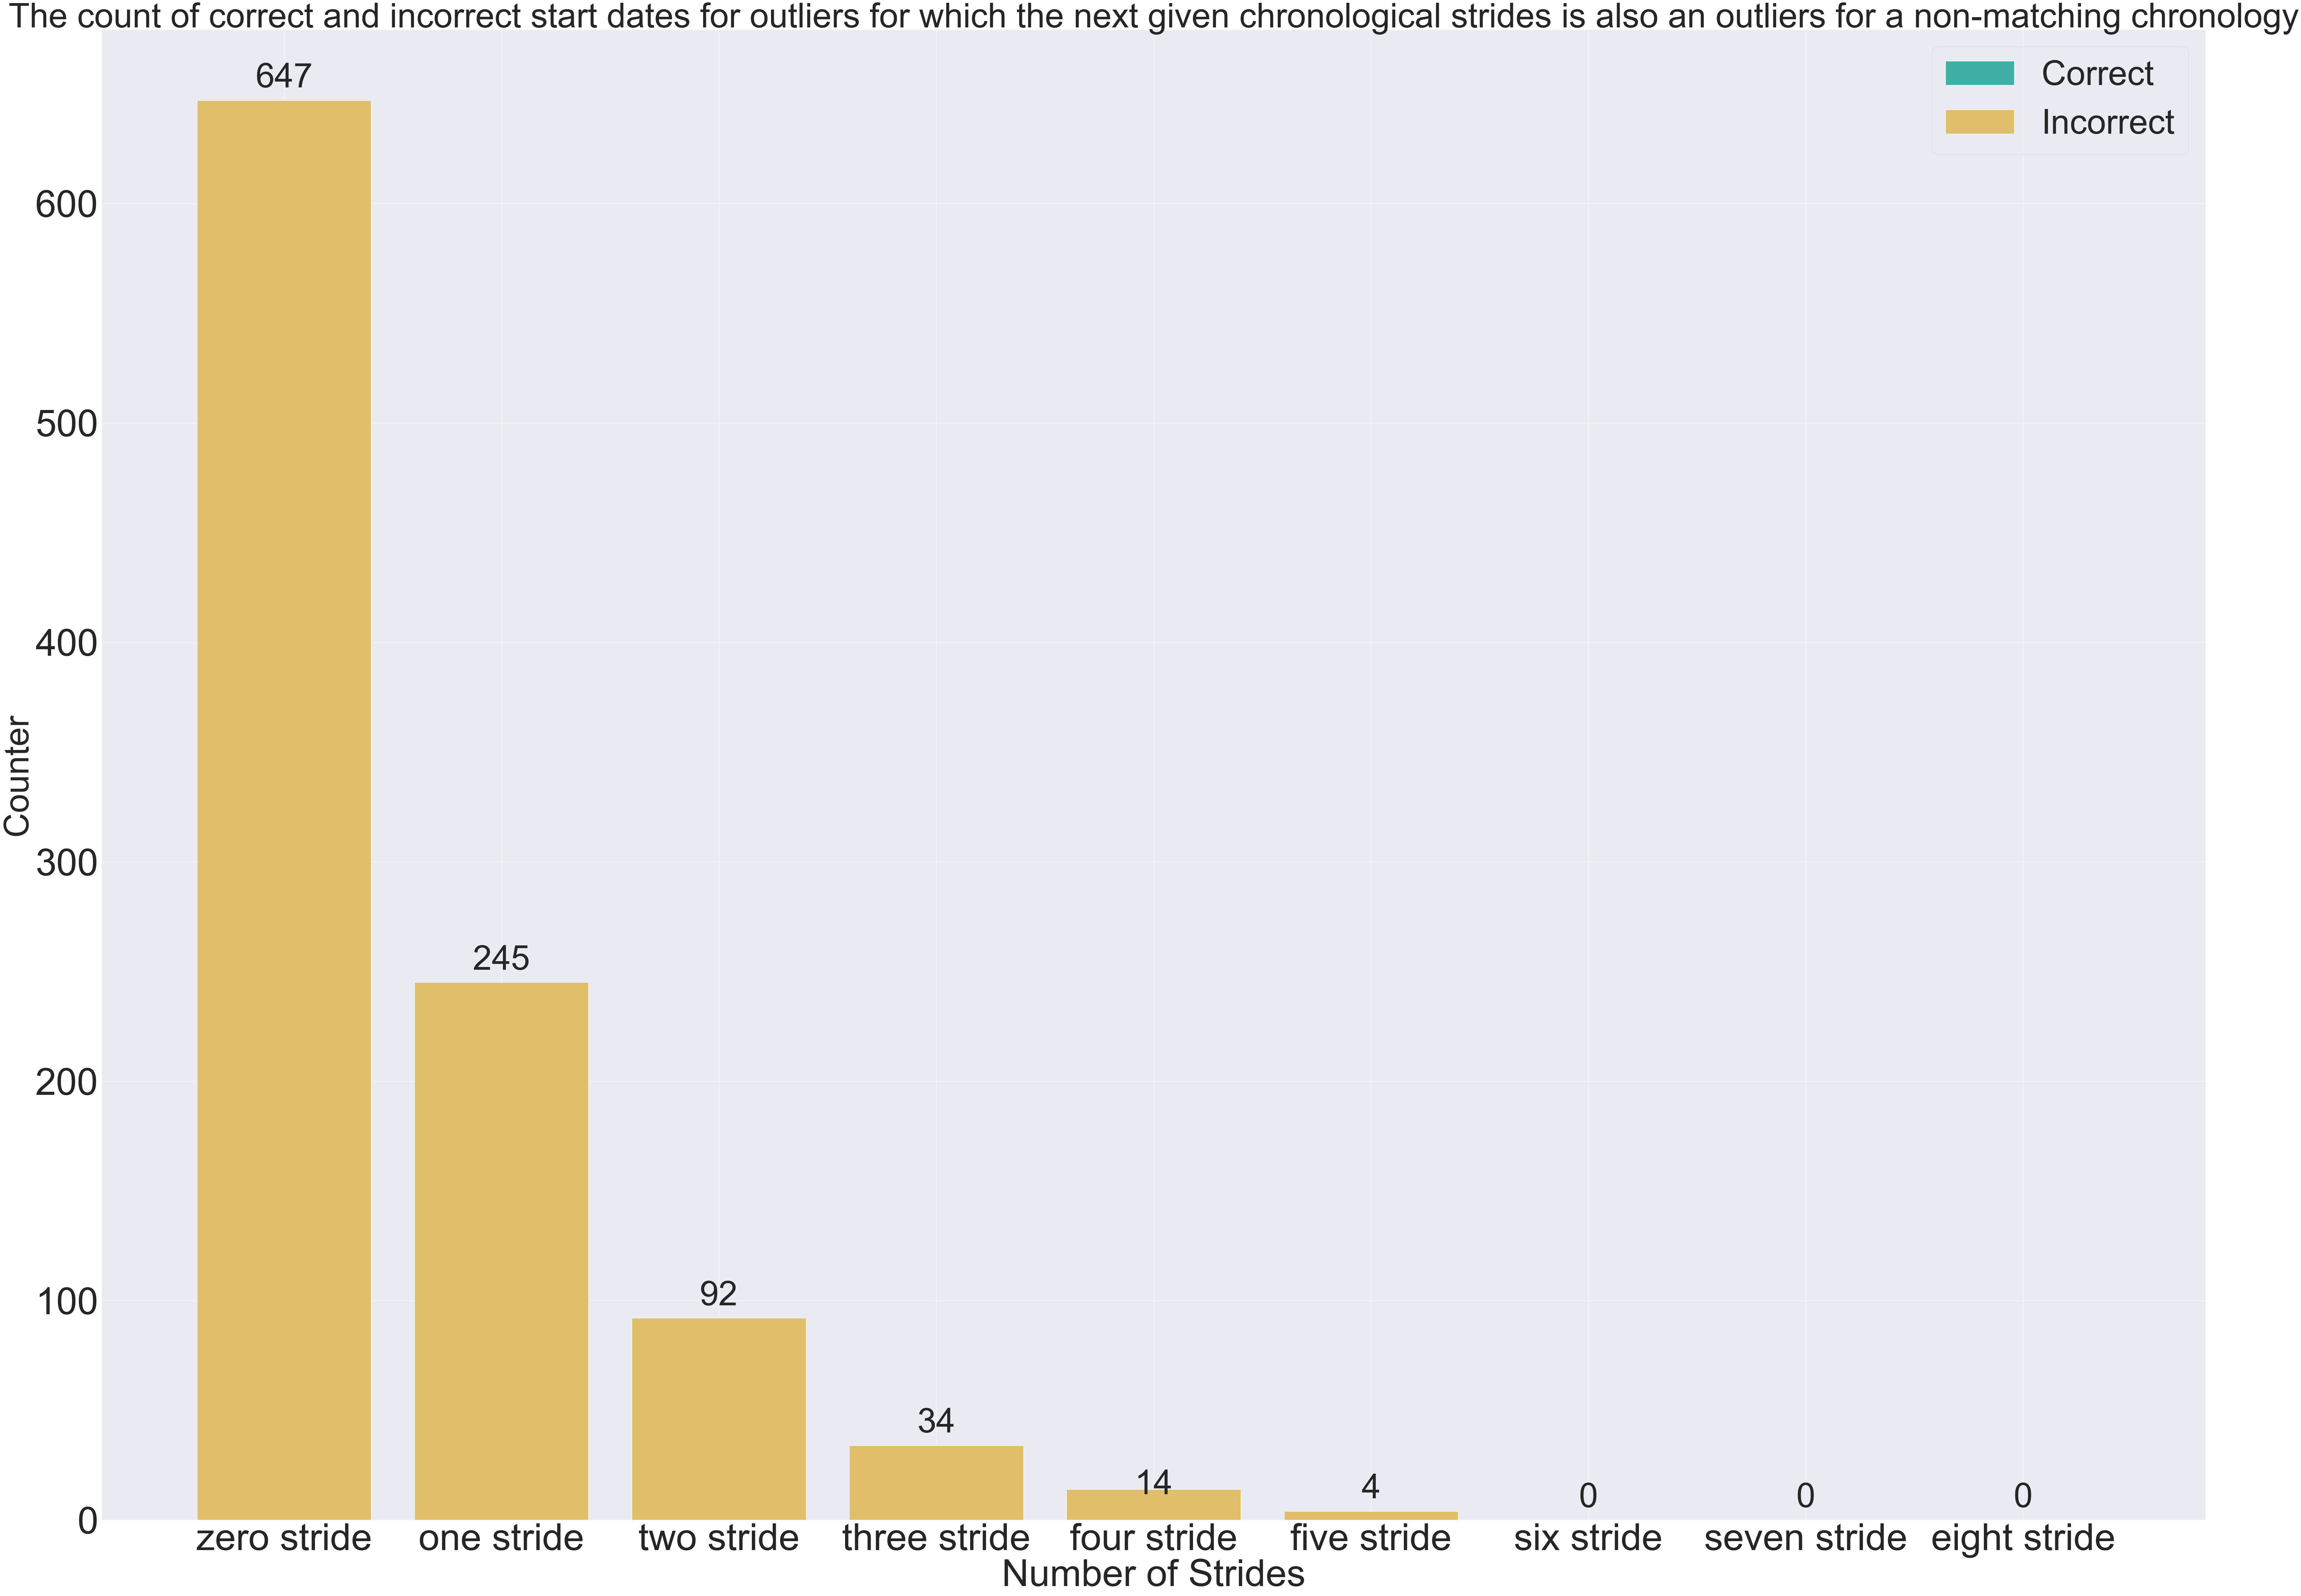

In [49]:
fig, ax = plt.subplots()
x = ['zero stride', 'one stride', 'two stride', 'three stride', 'four stride', 'five stride', 'six stride', 'seven stride', 'eight stride'  ]
plt.bar(x,[0, 0, 0, 0, 0, 0, 0, 0, 0] , color='#40B0A6')
plt.bar(x,[647, 245, 92, 34, 14, 4, 0, 0, 0] , color='#E1BE6A')
plt.xlabel("Number of Strides", fontsize=110)
plt.ylabel("Counter",fontsize=100)
plt.show
sns.set(rc={'figure.figsize':(110,80)})
plt.legend(["Correct", "Incorrect"],fontsize=100)
plt.title("The count of correct and incorrect start dates for outliers for which the next given chronological strides is also an outliers for a non-matching chronology",fontsize=100)
plt.xticks(fontsize=110)
plt.yticks(fontsize=110)
rects = ax.patches

plt.show
plt.savefig('no_match_stride_bar_graph.png')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

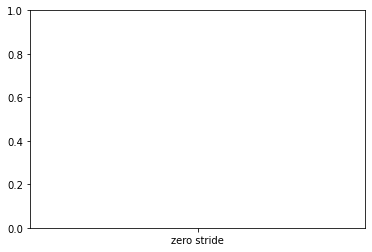

In [153]:
correct = [counter_sample_5_length[1886], counter_sample_10_length[1886], counter_sample_15_length[1886], counter_sample_20_length[1886], counter_sample_25_length[1886], counter_sample_30_length[1886], counter_sample_35_length[1886], counter_sample_40_length[1886]]
total = [correct_count_5_length, correct_count_10_length, correct_count_15_length, correct_count_20_length, correct_count_25_length, correct_count_30_length, correct_count_35_length, correct_count_40_length]
incorrect = [element1 - element2 for (element1, element2) in zip(total, correct)]
print(correct)
print(incorrect)
print(total)

[0, 13, 20, 52, 68, 72, 76, 71]
[8, 54, 66, 72, 67, 63, 56, 43]
[8, 67, 86, 124, 135, 135, 132, 114]


In [81]:
correct = [0, 8,10,37,63,67,76,71]
incorrect = [2, 3, 18,23,24,22,17,16]
total = [element1 + element2 for (element1, element2) in zip(incorrect, correct)]
print(correct)
print(incorrect)
print(total)

[0, 8, 10, 37, 63, 67, 76, 71]
[2, 3, 18, 23, 24, 22, 17, 16]
[2, 11, 28, 60, 87, 89, 93, 87]


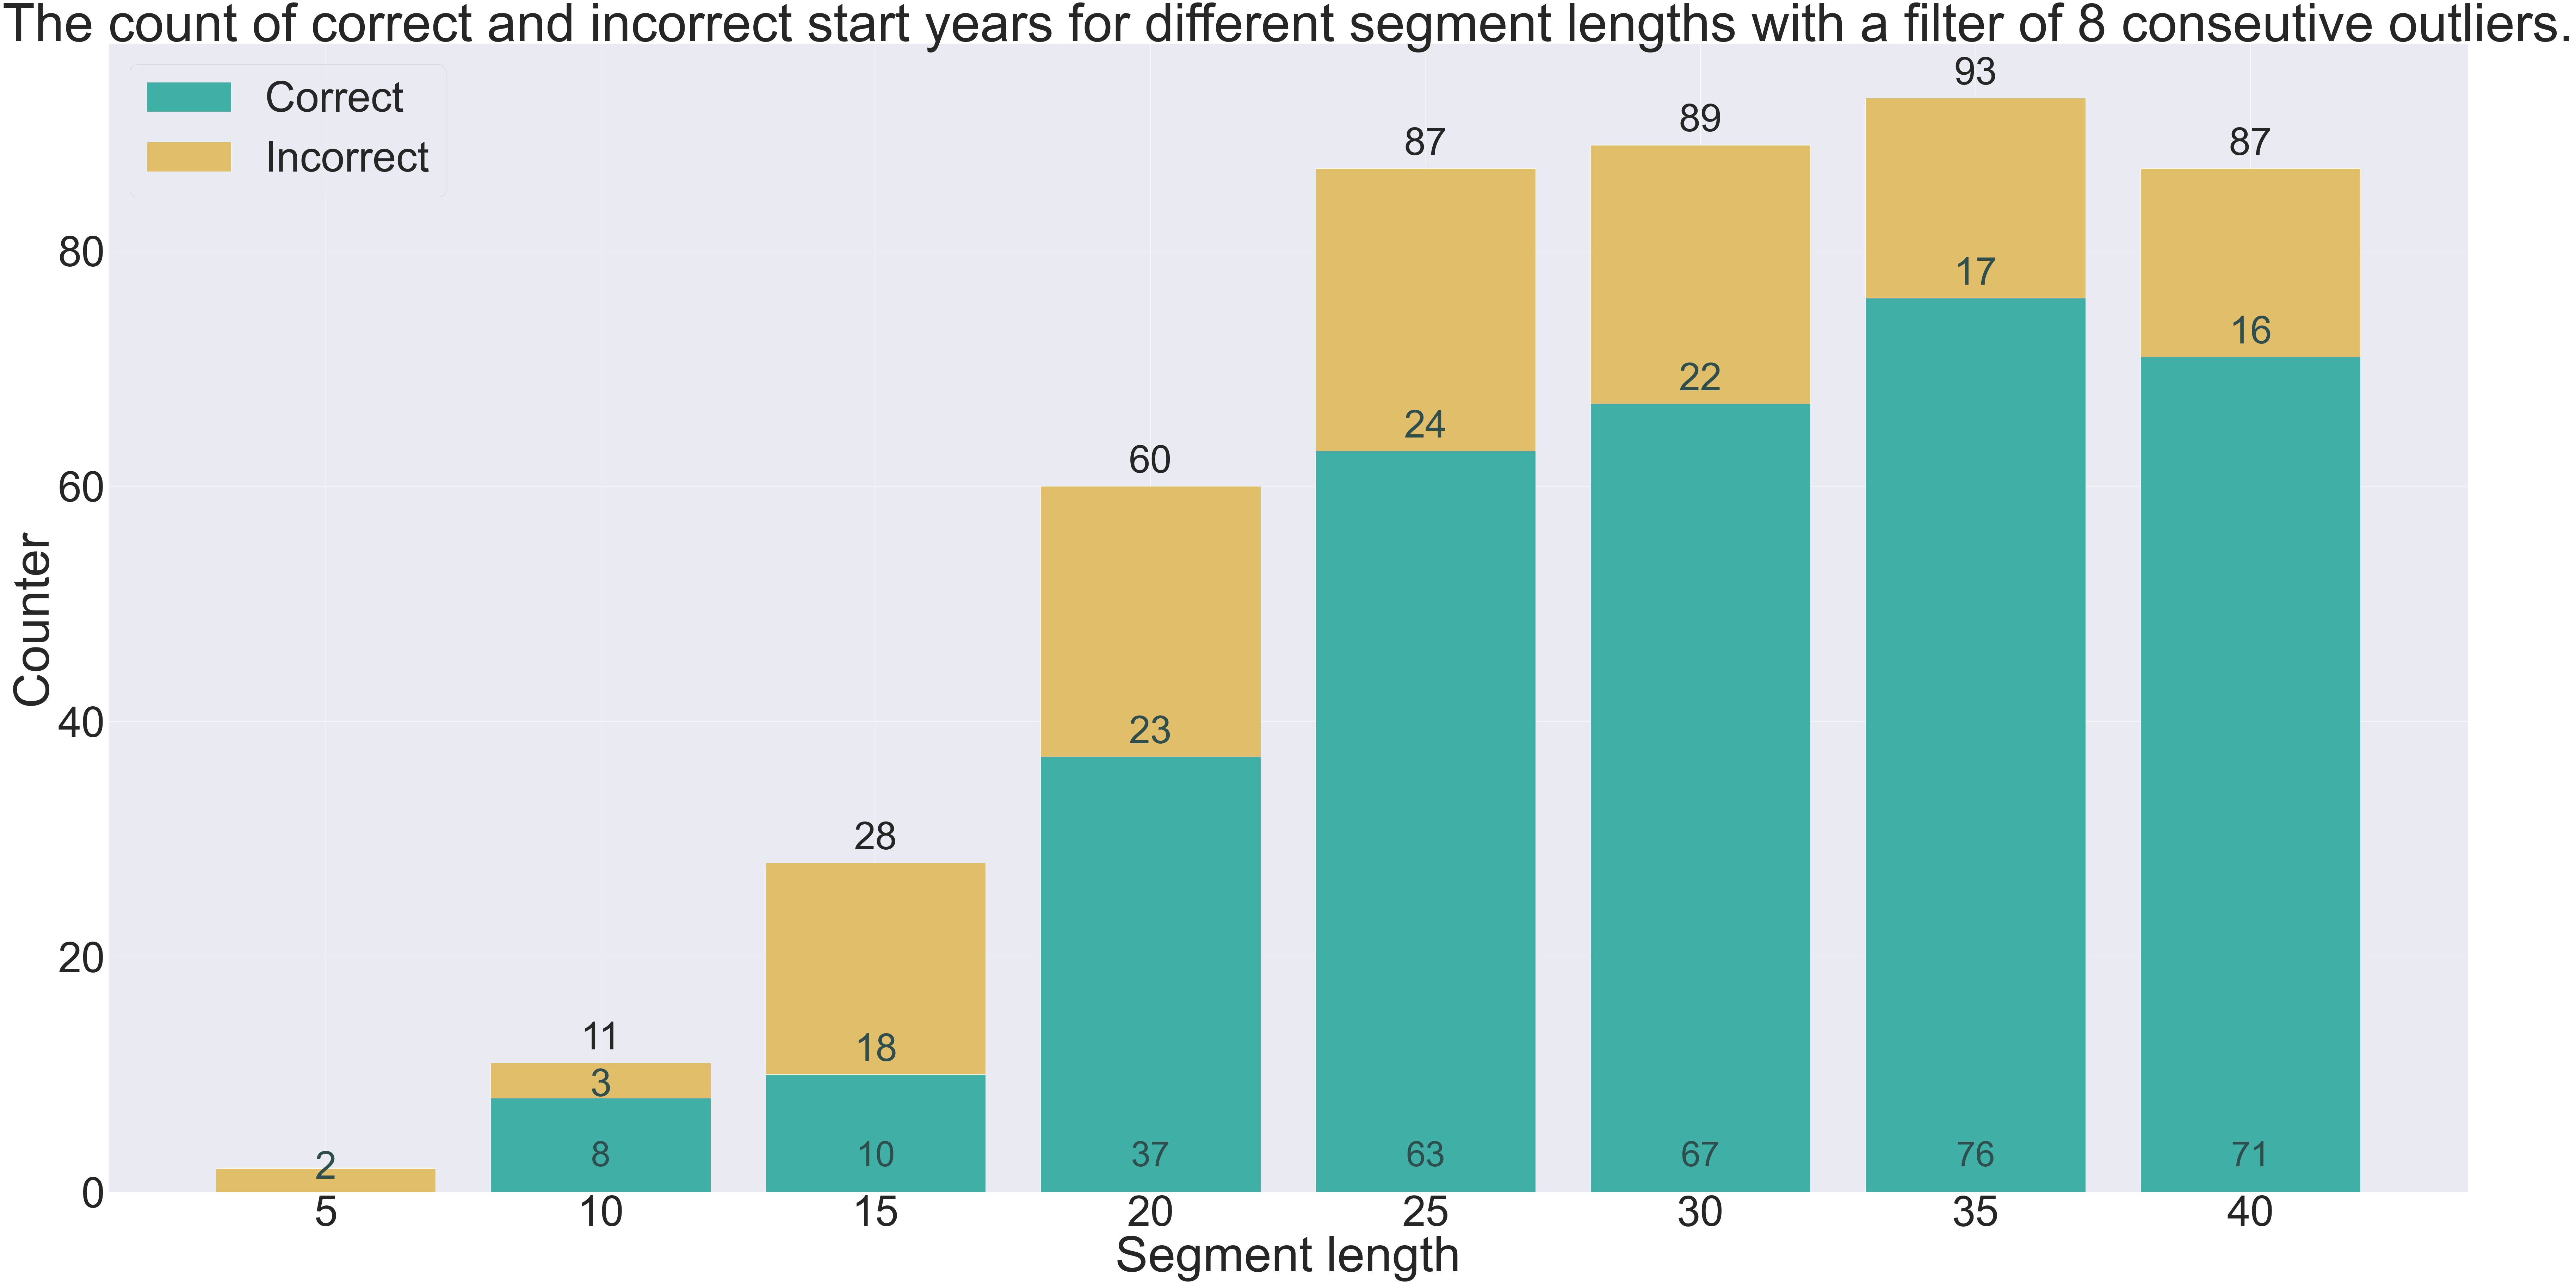

In [89]:
sns.set(rc={'figure.figsize':(120,60)})
fig, ax = plt.subplots()
x = ['5', '10', '15', '20', '25', '30', '35', '40']
plt.bar(x, correct, color='#40B0A6')
plt.bar(x, incorrect, bottom= correct, color='#E1BE6A')

plt.xlabel("Segment length", fontsize=140)
plt.ylabel("Counter",fontsize=140)
plt.legend(["Correct", "Incorrect"],fontsize=120)
plt.title("The count of correct and incorrect start years for different segment lengths with a filter of 8 conseutive outliers.",fontsize=150)
plt.xticks(fontsize=120)
plt.yticks(fontsize=120)
rects = ax.patches
for rect, c in zip(rects, correct):
    height = rect.get_height()
    if c != 0:
        ax.text(
            rect.get_x() + rect.get_width() / 2, 3, c, ha="center", va="center", fontsize=100, color= "darkslategrey")

for rect, i in zip(rects, incorrect):
    height = rect.get_height()
    if i != 0:
        if i == 3:
             ax.text(
            rect.get_x()+ rect.get_width() / 2, height+1, i, ha="center", va="center", fontsize=110, color = "darkslategrey")
        else:
            ax.text(
                rect.get_x() + rect.get_width() / 2, height+2, i, ha="center", va="center", fontsize=110, color = "darkslategrey")
  
        
        
for rect, i in zip(rects, total):
    height = rect.get_height()
    if i == 828 or i ==6 or i==2 :
        ax.text(
         rect.get_x() + rect.get_width() / 2, i+2, '', ha="center", va="center", fontsize=110)
    else:
  
        ax.text(
            rect.get_x() + rect.get_width() / 2, i+2, i, ha="center", va="center", fontsize=110)



plt.show
plt.savefig('segment_length_filter_8_2.png')

In [214]:
total = [counter_sample_1_dev, counter_sample_2_dev, counter_sample_3_dev]
correct = [correct_count_1_dev[1886], correct_count_2_dev[1886], correct_count_3_dev[1886]]
incorrect = [element1 - element2 for (element1, element2) in zip(total, correct)]
print(correct)
print(incorrect)
print(total)

[79, 18, 8]
[4246, 54, 3]
[4325, 72, 11]


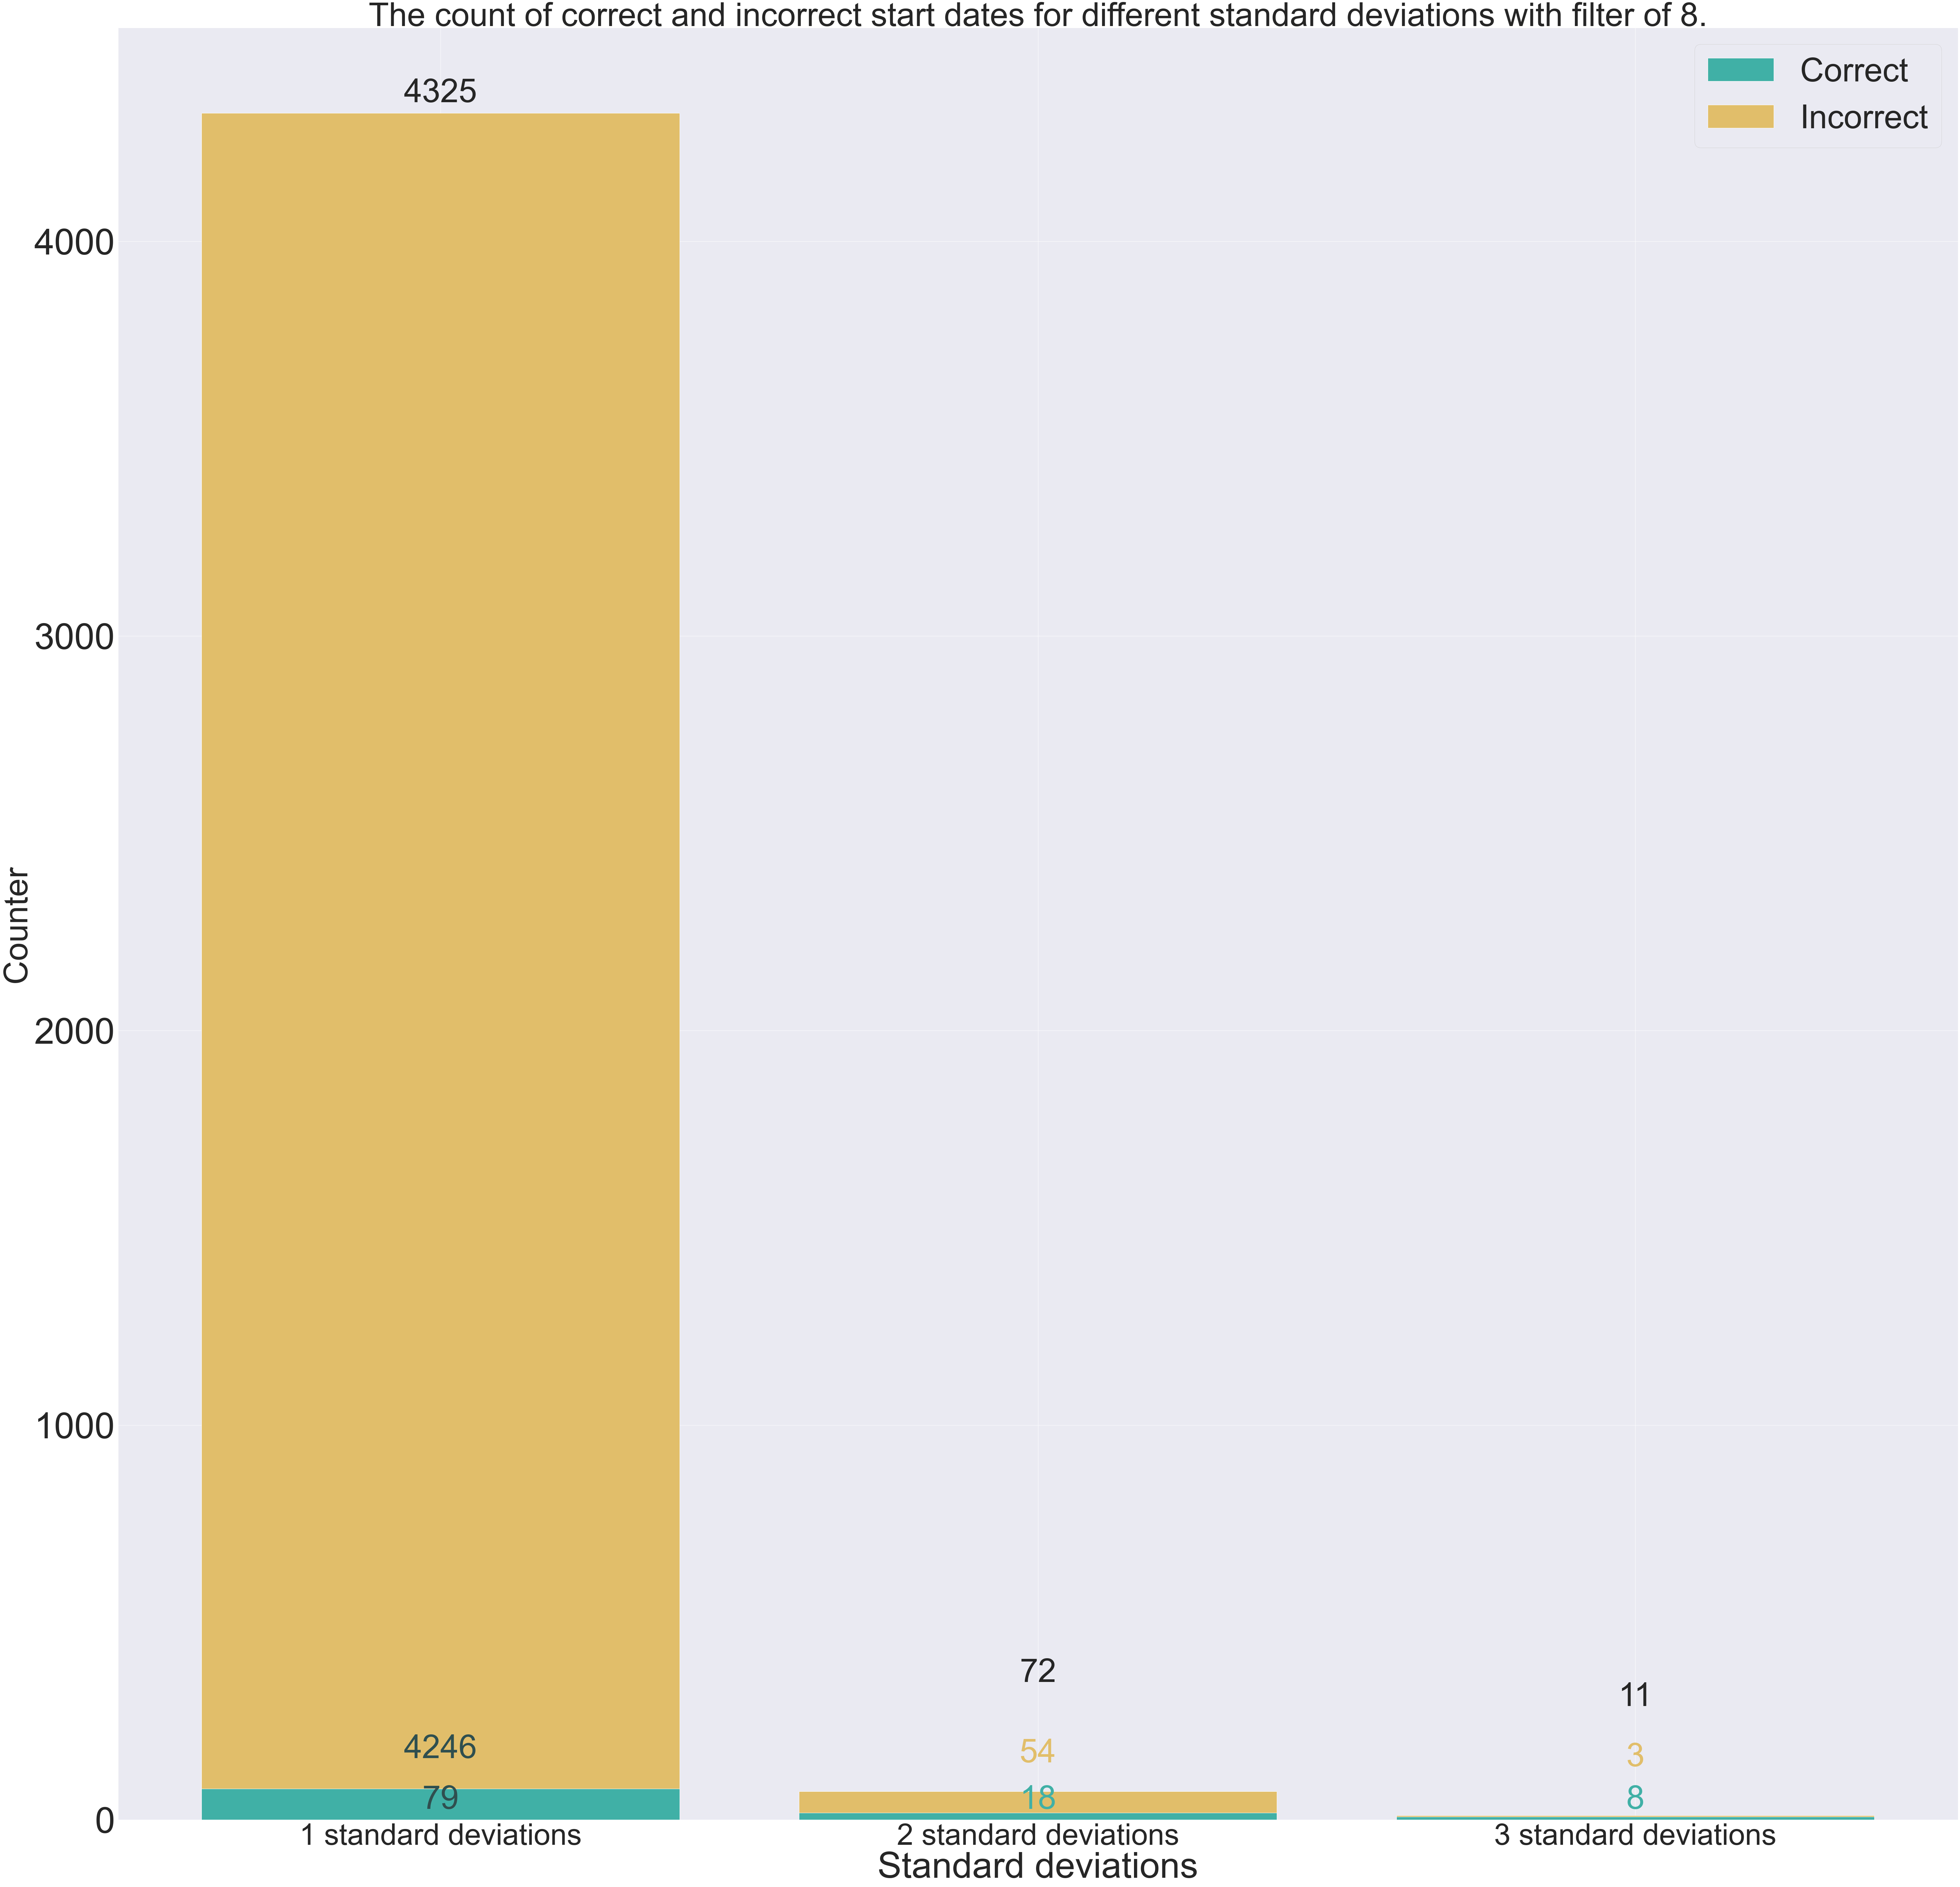

In [224]:
sns.set(rc={'figure.figsize':(100,100)})
fig, ax = plt.subplots()
x = ['1 standard deviations', '2 standard deviations', '3 standard deviations']
plt.bar(x, correct, color='#40B0A6')
plt.bar(x, incorrect, bottom =correct, color='#E1BE6A')

plt.xlabel("Standard deviations", fontsize=110)
plt.ylabel("Counter",fontsize=100)

sns.set(rc={'figure.figsize':(110,80)})
plt.legend(["Correct", "Incorrect"],fontsize=100)
plt.title("The count of correct and incorrect start dates for different standard deviations with filter of 8.",fontsize=100)
plt.xticks(fontsize=90)
plt.yticks(fontsize=110)
rects = ax.patches
for rect, c in zip(rects, correct):
    height = rect.get_height()
    if c == 18 or c ==8 :
         ax.text(
            rect.get_x() + rect.get_width() / 2, 50, c, ha="center", va="center", fontsize=100, color= "#40B0A6")
    elif c != 0:
        ax.text(
            rect.get_x() + rect.get_width() / 2, 50, c, ha="center", va="center", fontsize=100, color= "darkslategrey")
    
for rect, i in zip(rects, incorrect):
    height = rect.get_height()
    if i != 0:
        if i == 4246:
             ax.text(
            rect.get_x()+ rect.get_width() / 2, height+100, i, ha="center", va="center", fontsize=100, color='darkslategrey')
        else:
            ax.text(
                rect.get_x() + rect.get_width() / 2, height+150, i, ha="center", va="center", fontsize=100, color = '#E1BE6A')
  
        
        
for rect, i in zip(rects, total):
    height = rect.get_height()
    if i == 4325 or i==2 :
        ax.text(
         rect.get_x() + rect.get_width() / 2, i+50, i, ha="center", va="center", fontsize=100)
    elif i == 461:
         ax.text(
         rect.get_x() + rect.get_width() / 2, i+150, i, ha="center", va="center", fontsize=100)
    elif i == 1:
         ax.text(
         rect.get_x() + rect.get_width() / 2, i+150, '', ha="center", va="center", fontsize=100)
            
    else:
  
        ax.text(
            rect.get_x() + rect.get_width() / 2, i+300, i, ha="center", va="center", fontsize=100)



plt.show
plt.savefig('standard_deviations_filter_8.png')

In [225]:
print(7131937 function calls (6382152 primitive calls) in 8.643 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(append)
    62475    0.056    0.000    2.762    0.000 <__array_function__ internals>:177(average)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(bincount)
    62475    0.043    0.000    0.833    0.000 <__array_function__ internals>:177(broadcast_to)
    62475    0.063    0.000    1.519    0.000 <__array_function__ internals>:177(clip)
    62477    0.056    0.000    0.224    0.000 <__array_function__ internals>:177(concatenate)
        6    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(copyto)
    62475    0.049    0.000    7.526    0.000 <__array_function__ internals>:177(corrcoef)
    62475    0.050    0.000    4.776    0.000 <__array_function__ internals>:177(cov)
    62475    0.041    0.000    0.444    0.000 <__array_function__ internals>:177(diag)
    62475    0.038    0.000    0.247    0.000 <__array_function__ internals>:177(diagonal)
    62475    0.048    0.000    0.229    0.000 <__array_function__ internals>:177(dot)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(insert)
    62475    0.035    0.000    0.133    0.000 <__array_function__ internals>:177(iscomplexobj)
        1    0.000    0.000    0.003    0.003 <__array_function__ internals>:177(mean)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(moveaxis)
   124950    0.068    0.000    0.380    0.000 <__array_function__ internals>:177(ndim)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(ravel)
    62475    0.041    0.000    0.152    0.000 <__array_function__ internals>:177(result_type)
        1    0.000    0.000    0.004    0.004 <__array_function__ internals>:177(std)
        1    0.000    0.000    0.004    0.004 <frozen importlib._bootstrap>:1002(_find_and_load)
        5    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1033(_handle_fromlist)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:112(release)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:152(__init__)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:156(__enter__)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:160(__exit__)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:166(_get_module_lock)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:185(cb)
        1    0.000    0.000    0.001    0.001 <frozen importlib._bootstrap>:220(_call_with_frames_removed)
       17    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:231(_verbose_message)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:35(_new_module)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:351(__init__)
        2    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:385(cached)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:398(parent)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:406(has_location)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:486(_init_module_attrs)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:558(module_from_spec)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:58(__init__)
        1    0.000    0.000    0.003    0.003 <frozen importlib._bootstrap>:659(_load_unlocked)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:736(find_spec)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:811(find_spec)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:87(acquire)
        3    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:874(__enter__)
        3    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:878(__exit__)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:901(_find_spec)
        1    0.000    0.000    0.004    0.004 <frozen importlib._bootstrap>:967(_find_and_load_unlocked)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:1017(path_stats)
        4    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:1272(_path_importer_cache)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:1309(_get_spec)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:1341(find_spec)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:1433(_get_spec)
        3    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:1438(find_spec)
        2    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:301(cache_from_source)
        3    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:36(_relax_case)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:431(_get_cached)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:463(_check_name_wrapper)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:500(_classify_pyc)
        3    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:51(_unpack_uint32)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:533(_validate_timestamp_pyc)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:585(_compile_bytecode)
       16    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:62(_path_join)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:636(spec_from_file_location)
       16    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:64(<listcomp>)
        2    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:68(_path_split)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:781(create_module)
        1    0.000    0.000    0.003    0.003 <frozen importlib._bootstrap_external>:784(exec_module)
        5    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:80(_path_stat)
        1    0.000    0.000    0.002    0.002 <frozen importlib._bootstrap_external>:856(get_code)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:90(_path_is_mode_type)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:946(__init__)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:971(get_filename)
        1    0.000    0.000    0.002    0.002 <frozen importlib._bootstrap_external>:976(get_data)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap_external>:99(_path_isfile)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 <string>:1(__create_fn__)
       15    0.000    0.000    0.000    0.000 PySimpleGUI.py:10385(find_element)
       15    0.000    0.000    0.000    0.000 PySimpleGUI.py:11690(__getitem__)
       15    0.000    0.000    0.000    0.000 PySimpleGUI.py:1694(_widget_was_created)
        7    0.000    0.000    0.001    0.000 PySimpleGUI.py:3744(update)
        8    0.000    0.000    0.000    0.000 PySimpleGUI.py:4205(Update)
        8    0.000    0.000    0.027    0.003 PySimpleGUI.py:5348(update)
       16    0.000    0.000    0.000    0.000 __init__.py:101(_cnfmerge)
        8    0.000    0.000    0.027    0.003 __init__.py:1305(update)
        8    0.000    0.000    0.000    0.000 __init__.py:1461(_options)
        8    0.000    0.000    0.000    0.000 __init__.py:1619(_configure)
        8    0.000    0.000    0.000    0.000 __init__.py:1632(configure)
        8    0.000    0.000    0.000    0.000 __init__.py:1649(__setitem__)
        7    0.000    0.000    0.001    0.000 __init__.py:363(set)
        1    0.000    0.000    0.000    0.000 __init__.py:581(__init__)
        2    0.000    0.000    0.000    0.000 __init__.py:600(most_common)
        1    0.000    0.000    0.000    0.000 __init__.py:649(update)
       30    0.000    0.000    0.000    0.000 _collections_abc.py:405(__subclasshook__)
        2    0.000    0.000    0.000    0.000 _dtype.py:24(_kind_name)
        2    0.000    0.000    0.000    0.000 _dtype.py:330(_name_includes_bit_suffix)
        2    0.000    0.000    0.000    0.000 _dtype.py:344(_name_get)
   124950    0.057    0.000    0.070    0.000 _methods.py:103(_clip_dep_is_byte_swapped)
    62475    0.231    0.000    0.231    0.000 _methods.py:108(_clip_dep_invoke_with_casting)
    62475    0.138    0.000    1.226    0.000 _methods.py:127(_clip)
    62476    0.493    0.000    1.470    0.000 _methods.py:164(_mean)
        1    0.001    0.001    0.004    0.004 _methods.py:198(_var)
        1    0.000    0.000    0.004    0.004 _methods.py:267(_std)
       34    0.000    0.000    0.000    0.000 _methods.py:55(_any)
    62477    0.146    0.000    0.181    0.000 _methods.py:67(_count_reduce_items)
   124950    0.408    0.000    0.787    0.000 _methods.py:93(_clip_dep_is_scalar_nan)
   124952    0.065    0.000    0.177    0.000 _ufunc_config.py:452(_no_nep50_warning)
     30/2    0.000    0.000    0.000    0.000 abc.py:100(__subclasscheck__)
        4    0.000    0.000    0.000    0.000 abc.py:96(__instancecheck__)
        4    0.000    0.000    0.000    0.000 base.py:1023(view)
        2    0.000    0.000    0.000    0.000 base.py:1734(name)
        2    0.000    0.000    0.000    0.000 base.py:2381(is_unique)
        3    0.000    0.000    0.000    0.000 base.py:241(disallow_kwargs)
        2    0.000    0.000    0.000    0.000 base.py:2421(is_boolean)
        2    0.000    0.000    0.000    0.000 base.py:2745(inferred_type)
        2    0.000    0.000    0.000    0.000 base.py:2783(_is_multi)
        5    0.000    0.000    0.000    0.000 base.py:286(is_dtype)
        3    0.000    0.000    0.000    0.000 base.py:3754(get_loc)
        1    0.000    0.000    0.001    0.001 base.py:3888(get_indexer)
        1    0.000    0.000    0.000    0.000 base.py:4020(_check_indexing_method)
        2    0.000    0.000    0.000    0.000 base.py:413(_engine_type)
      5/3    0.000    0.000    0.001    0.000 base.py:430(__new__)
       25    0.000    0.000    0.000    0.000 base.py:5090(_values)
        2    0.000    0.000    0.000    0.000 base.py:5116(_get_engine_target)
        1    0.000    0.000    0.000    0.000 base.py:5204(_validate_fill_value)
        4    0.000    0.000    0.000    0.000 base.py:5254(__contains__)
       40    0.000    0.000    0.000    0.000 base.py:5304(__getitem__)
        1    0.000    0.000    0.000    0.000 base.py:54(shape)
        1    0.000    0.000    0.001    0.001 base.py:5464(equals)
        2    0.000    0.000    0.000    0.000 base.py:555(<genexpr>)
        3    0.000    0.000    0.000    0.000 base.py:56(<genexpr>)
        3    0.000    0.000    0.000    0.000 base.py:574(_ensure_array)
        1    0.000    0.000    0.000    0.000 base.py:58(_validate_set_axis)
        3    0.000    0.000    0.000    0.000 base.py:588(_dtype_to_subclass)
        1    0.000    0.000    0.001    0.001 base.py:6032(get_indexer_for)
        2    0.000    0.000    0.000    0.000 base.py:6193(_index_as_unique)
        1    0.000    0.000    0.000    0.000 base.py:6205(_maybe_promote)
        1    0.000    0.000    0.000    0.000 base.py:6285(_should_compare)
        1    0.000    0.000    0.000    0.000 base.py:6303(_is_comparable_dtype)
        1    0.000    0.000    0.000    0.000 base.py:6397(_transform_index)
        1    0.000    0.000    0.000    0.000 base.py:6416(<listcomp>)
        3    0.000    0.000    0.000    0.000 base.py:6569(_maybe_cast_indexer)
        1    0.000    0.000    0.000    0.000 base.py:6576(_maybe_cast_listlike_indexer)
        1    0.000    0.000    0.000    0.000 base.py:6844(insert)
        7    0.000    0.000    0.000    0.000 base.py:690(_simple_new)
        2    0.000    0.000    0.001    0.000 base.py:708(_with_infer)
        2    0.000    0.000    0.000    0.000 base.py:721(tolist)
        2    0.000    0.000    0.000    0.000 base.py:7277(ensure_index)
        5    0.000    0.000    0.000    0.000 base.py:7372(maybe_extract_name)
        3    0.000    0.000    0.000    0.000 base.py:7396(_maybe_cast_data_without_dtype)
        3    0.000    0.000    0.000    0.000 base.py:742(__iter__)
        1    0.000    0.000    0.000    0.000 base.py:7456(unpack_nested_dtype)
        4    0.000    0.000    0.000    0.000 base.py:821(_view)
        1    0.000    0.000    0.000    0.000 base.py:839(is_)
        7    0.000    0.000    0.000    0.000 base.py:870(_reset_identity)
        2    0.000    0.000    0.000    0.000 base.py:881(_engine)
       14    0.000    0.000    0.000    0.000 base.py:925(__len__)
        3    0.000    0.000    0.000    0.000 base.py:986(dtype)
        1    0.000    0.000    0.000    0.000 blocks.py:2091(maybe_coerce_values)
        1    0.000    0.000    0.000    0.000 blocks.py:2120(get_block_type)
        1    0.000    0.000    0.000    0.000 blocks.py:2161(new_block_2d)
        2    0.000    0.000    0.000    0.000 blocks.py:2250(extend_blocks)
        1    0.000    0.000    0.000    0.000 blocks.py:2266(ensure_block_shape)
        2    0.000    0.000    0.000    0.000 blocks.py:544(copy)
        2    0.000    0.000    0.000    0.000 blocks.py:827(iget)
        1    0.000    0.000    0.004    0.004 cProfile.py:40(print_stats)
        1    0.000    0.000    0.000    0.000 cProfile.py:50(create_stats)
        1    0.000    0.000    0.000    0.000 cast.py:120(maybe_convert_platform)
        3    0.000    0.000    0.000    0.000 cast.py:1763(construct_1d_object_array_from_listlike)
        1    0.000    0.000    0.000    0.000 cast.py:1931(np_can_hold_element)
       34    0.000    0.000    0.000    0.000 common.py:1154(needs_i8_conversion)
        1    0.000    0.000    0.000    0.000 common.py:1204(is_numeric_dtype)
        5    0.000    0.000    0.000    0.000 common.py:1246(is_float_dtype)
        1    0.000    0.000    0.000    0.000 common.py:1420(is_1d_only_ea_dtype)
        1    0.000    0.000    0.000    0.000 common.py:1433(is_extension_array_dtype)
       10    0.000    0.000    0.000    0.000 common.py:146(classes)
       10    0.000    0.000    0.000    0.000 common.py:148(<lambda>)
       10    0.000    0.000    0.000    0.000 common.py:1487(is_ea_or_datetimelike_dtype)
       40    0.000    0.000    0.000    0.000 common.py:151(cast_scalar_indexer)
        7    0.000    0.000    0.000    0.000 common.py:151(classes_and_not_datetimelike)
        2    0.000    0.000    0.000    0.000 common.py:1556(get_dtype)
        7    0.000    0.000    0.000    0.000 common.py:156(<lambda>)
       17    0.000    0.000    0.000    0.000 common.py:1591(_is_dtype_type)
        5    0.000    0.000    0.000    0.000 common.py:162(is_object_dtype)
        2    0.000    0.000    0.000    0.000 common.py:1751(pandas_dtype)
        5    0.000    0.000    0.000    0.000 common.py:235(asarray_tuplesafe)
        3    0.000    0.000    0.000    0.000 common.py:362(apply_if_callable)
        1    0.000    0.000    0.000    0.000 common.py:463(is_interval_dtype)
        4    0.000    0.000    0.000    0.000 common.py:501(is_categorical_dtype)
        1    0.000    0.000    0.000    0.000 common.py:516(get_rename_function)
        2    0.000    0.000    0.000    0.000 common.py:522(f)
       34    0.000    0.000    0.000    0.000 common.py:537(is_string_or_object_np_dtype)
        1    0.000    0.000    0.000    0.000 common.py:566(require_length_match)
        1    0.000    0.000    0.000    0.000 common.py:585(is_dtype_equal)
        3    0.000    0.000    0.000    0.000 common.py:736(is_signed_integer_dtype)
        3    0.000    0.000    0.000    0.000 common.py:790(is_unsigned_integer_dtype)
        1    0.000    0.000    0.000    0.000 config.py:116(_get_single_key)
        1    0.000    0.000    0.000    0.000 config.py:134(_get_option)
        1    0.000    0.000    0.000    0.000 config.py:262(__call__)
        1    0.000    0.000    0.000    0.000 config.py:579(_select_options)
        1    0.000    0.000    0.000    0.000 config.py:597(_get_root)
        2    0.000    0.000    0.000    0.000 config.py:611(_get_deprecated_option)
        1    0.000    0.000    0.000    0.000 config.py:638(_translate_key)
        1    0.000    0.000    0.000    0.000 config.py:650(_warn_if_deprecated)
        3    0.000    0.000    0.000    0.000 construction.py:399(extract_array)
        6    0.000    0.000    0.000    0.000 construction.py:461(ensure_wrapped_if_datetimelike)
        3    0.000    0.000    0.000    0.000 construction.py:493(sanitize_array)
        3    0.000    0.000    0.000    0.000 construction.py:676(_sanitize_ndim)
        3    0.000    0.000    0.000    0.000 construction.py:713(_sanitize_str_dtypes)
        3    0.000    0.000    0.000    0.000 construction.py:733(_maybe_repeat)
        2    0.000    0.000    0.000    0.000 construction.py:744(_try_cast)
    62476    0.039    0.000    0.180    0.000 contextlib.py:112(__enter__)
    62476    0.070    0.000    0.158    0.000 contextlib.py:121(__exit__)
    62476    0.046    0.000    0.139    0.000 contextlib.py:242(helper)
    62476    0.080    0.000    0.093    0.000 contextlib.py:86(__init__)
        2    0.000    0.000    0.001    0.001 dataclasses.py:1012(wrap)
        9    0.000    0.000    0.000    0.000 dataclasses.py:244(__init__)
        2    0.000    0.000    0.000    0.000 dataclasses.py:300(__init__)
        9    0.000    0.000    0.000    0.000 dataclasses.py:322(field)
        6    0.000    0.000    0.000    0.000 dataclasses.py:344(_tuple_str)
        6    0.000    0.000    0.000    0.000 dataclasses.py:353(<listcomp>)
        2    0.000    0.000    0.000    0.000 dataclasses.py:358(_recursive_repr)
        8    0.000    0.000    0.001    0.000 dataclasses.py:377(_create_fn)
       27    0.000    0.000    0.000    0.000 dataclasses.py:391(<genexpr>)
        9    0.000    0.000    0.000    0.000 dataclasses.py:404(_field_assign)
        9    0.000    0.000    0.000    0.000 dataclasses.py:416(_field_init)
        9    0.000    0.000    0.000    0.000 dataclasses.py:470(_init_param)
        2    0.000    0.000    0.000    0.000 dataclasses.py:489(_init_fn)
        2    0.000    0.000    0.000    0.000 dataclasses.py:507(<dictcomp>)
        2    0.000    0.000    0.000    0.000 dataclasses.py:532(<listcomp>)
        2    0.000    0.000    0.000    0.000 dataclasses.py:539(_repr_fn)
        2    0.000    0.000    0.000    0.000 dataclasses.py:543(<listcomp>)
        2    0.000    0.000    0.000    0.000 dataclasses.py:575(_cmp_fn)
        2    0.000    0.000    0.000    0.000 dataclasses.py:589(_hash_fn)
        9    0.000    0.000    0.000    0.000 dataclasses.py:597(_is_classvar)
        9    0.000    0.000    0.000    0.000 dataclasses.py:605(_is_initvar)
        9    0.000    0.000    0.000    0.000 dataclasses.py:671(_get_field)
        6    0.000    0.000    0.000    0.000 dataclasses.py:753(_set_new_attribute)
        2    0.000    0.000    0.000    0.000 dataclasses.py:770(_hash_add)
        2    0.000    0.000    0.000    0.000 dataclasses.py:771(<listcomp>)
        2    0.000    0.000    0.001    0.001 dataclasses.py:809(_process_class)
        2    0.000    0.000    0.000    0.000 dataclasses.py:863(<listcomp>)
        2    0.000    0.000    0.000    0.000 dataclasses.py:924(<listcomp>)
        2    0.000    0.000    0.000    0.000 dataclasses.py:940(<listcomp>)
        2    0.000    0.000    0.000    0.000 dataclasses.py:943(<listcomp>)
        2    0.000    0.000    0.000    0.000 dataclasses.py:949(<listcomp>)
        2    0.000    0.000    0.000    0.000 dataclasses.py:998(dataclass)
        1    0.000    0.000    0.000    0.000 dtypes.py:1247(is_dtype)
        9    0.000    0.000    0.000    0.000 enum.py:12(_is_descriptor)
        1    0.000    0.000    0.000    0.000 enum.py:124(__prepare__)
        1    0.000    0.000    0.000    0.000 enum.py:136(__new__)
        1    0.000    0.000    0.000    0.000 enum.py:153(<dictcomp>)
        1    0.000    0.000    0.000    0.000 enum.py:178(<setcomp>)
        3    0.000    0.000    0.000    0.000 enum.py:199(<genexpr>)
       13    0.000    0.000    0.000    0.000 enum.py:20(_is_dunder)
       14    0.000    0.000    0.000    0.000 enum.py:28(_is_sunder)
        8    0.000    0.000    0.000    0.000 enum.py:289(__call__)
       18    0.000    0.000    0.000    0.000 enum.py:379(__setattr__)
        1    0.000    0.000    0.000    0.000 enum.py:478(_check_for_existing_members)
        2    0.000    0.000    0.000    0.000 enum.py:485(_get_mixins_)
        2    0.000    0.000    0.000    0.000 enum.py:496(_find_data_type)
        1    0.000    0.000    0.000    0.000 enum.py:528(_find_new_)
        1    0.000    0.000    0.000    0.000 enum.py:58(__init__)
        8    0.000    0.000    0.000    0.000 enum.py:580(__new__)
       14    0.000    0.000    0.000    0.000 enum.py:65(__setitem__)
        2    0.000    0.000    0.000    0.000 enum.py:683(value)
        4    0.000    0.000    0.000    0.000 flags.py:49(__init__)
        5    0.000    0.000    0.000    0.000 flags.py:53(allows_duplicate_labels)
        5    0.000    0.000    0.000    0.000 flags.py:85(allows_duplicate_labels)
        1    0.000    0.000    0.000    0.000 frame.py:1498(__len__)
        2    0.000    0.000    0.000    0.000 frame.py:3703(_ixs)
        2    0.000    0.000    0.001    0.000 frame.py:3758(__getitem__)
        1    0.000    0.000    0.001    0.001 frame.py:3955(__setitem__)
        1    0.000    0.000    0.001    0.001 frame.py:4139(_set_item_mgr)
        1    0.000    0.000    0.001    0.001 frame.py:4164(_set_item)
        1    0.000    0.000    0.000    0.000 frame.py:4234(_ensure_valid_index)
        2    0.000    0.000    0.000    0.000 frame.py:4257(_box_col_values)
        4    0.000    0.000    0.000    0.000 frame.py:4271(_clear_item_cache)
        2    0.000    0.000    0.000    0.000 frame.py:4274(_get_item_cache)
        1    0.000    0.000    0.000    0.000 frame.py:4892(_sanitize_column)
        1    0.000    0.000    0.002    0.002 frame.py:5454(rename)
        2    0.000    0.000    0.000    0.000 frame.py:600(_constructor)
        2    0.000    0.000    0.000    0.000 frame.py:609(__init__)
       34    0.000    0.000    0.000    0.000 frame.py:951(_values)
    62475    0.010    0.000    0.010    0.000 fromnumeric.py:1574(_diagonal_dispatcher)
    62475    0.059    0.000    0.170    0.000 fromnumeric.py:1578(diagonal)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:1777(_ravel_dispatcher)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:1781(ravel)
    62475    0.011    0.000    0.011    0.000 fromnumeric.py:2107(_clip_dispatcher)
    62475    0.065    0.000    1.399    0.000 fromnumeric.py:2111(clip)
   124950    0.018    0.000    0.018    0.000 fromnumeric.py:3148(_ndim_dispatcher)
   124950    0.163    0.000    0.234    0.000 fromnumeric.py:3152(ndim)
        1    0.000    0.000    0.000    0.000 fromnumeric.py:3340(_mean_dispatcher)
        1    0.000    0.000    0.003    0.003 fromnumeric.py:3345(mean)
        1    0.000    0.000    0.000    0.000 fromnumeric.py:3468(_std_dispatcher)
        1    0.000    0.000    0.004    0.004 fromnumeric.py:3473(std)
    62475    0.043    0.000    1.334    0.000 fromnumeric.py:51(_wrapfunc)
    62475    0.012    0.000    0.012    0.000 function_base.py:2482(_cov_dispatcher)
    62475    0.997    0.000    4.651    0.000 function_base.py:2487(cov)
    62475    0.011    0.000    0.011    0.000 function_base.py:2709(_corrcoef_dispatcher)
    62475    0.545    0.000    7.417    0.000 function_base.py:2714(corrcoef)
    62475    0.026    0.000    0.036    0.000 function_base.py:346(iterable)
    62475    0.010    0.000    0.010    0.000 function_base.py:391(_average_dispatcher)
    62475    0.225    0.000    2.650    0.000 function_base.py:396(average)
        1    0.000    0.000    0.000    0.000 function_base.py:5246(_insert_dispatcher)
        1    0.000    0.000    0.000    0.000 function_base.py:5250(insert)
        2    0.000    0.000    0.000    0.000 function_base.py:5440(_append_dispatcher)
        2    0.000    0.000    0.000    0.000 function_base.py:5444(append)
        2    0.000    0.000    0.000    0.000 functools.py:35(update_wrapper)
        2    0.000    0.000    0.000    0.000 functools.py:65(wraps)
        1    0.000    0.000    0.001    0.001 generic.py:1043(_rename)
       34    0.000    0.000    0.002    0.000 generic.py:12141(_find_valid_index)
       34    0.000    0.000    0.002    0.000 generic.py:12160(first_valid_index)
        4    0.000    0.000    0.000    0.000 generic.py:259(__init__)
        5    0.000    0.000    0.000    0.000 generic.py:332(attrs)
       10    0.000    0.000    0.000    0.000 generic.py:353(flags)
       79    0.000    0.000    0.000    0.000 generic.py:40(_check)
        1    0.000    0.000    0.000    0.000 generic.py:4137(_check_setitem_copy)
        1    0.000    0.000    0.000    0.000 generic.py:4255(_check_inplace_and_allows_duplicate_labels)
       79    0.000    0.000    0.000    0.000 generic.py:45(_instancecheck)
        3    0.000    0.000    0.000    0.000 generic.py:550(_get_axis_number)
        1    0.000    0.000    0.000    0.000 generic.py:558(_get_axis_name)
        1    0.000    0.000    0.000    0.000 generic.py:564(_get_axis)
        5    0.000    0.000    0.000    0.000 generic.py:5844(__finalize__)
       39    0.000    0.000    0.000    0.000 generic.py:5904(__setattr__)
       34    0.000    0.000    0.000    0.000 generic.py:5959(_protect_consolidate)
       34    0.000    0.000    0.000    0.000 generic.py:5973(_consolidate_inplace)
       34    0.000    0.000    0.000    0.000 generic.py:5977(f)
        2    0.000    0.000    0.000    0.000 generic.py:6258(copy)
        2    0.000    0.000    0.000    0.000 generic.py:640(_info_axis)
        1    0.000    0.000    0.000    0.000 generic.py:810(_set_axis_nocheck)
        1    0.000    0.000    0.000    0.000 generic.py:821(_set_axis)
        2    0.000    0.000    0.000    0.000 heapq.py:521(nlargest)
        1    0.000    0.000    0.002    0.002 helper.py:18(rename_dataframe)
        1    0.000    0.000    0.001    0.001 helper.py:26(convert_dataframe_to_list)
        2    0.000    0.000    0.000    0.000 helper.py:31(<listcomp>)
        1    0.000    0.000    0.002    0.002 helper.py:37(divide_list_to_segments)
        2    0.002    0.001    0.002    0.001 helper.py:44(<listcomp>)
        1    0.000    0.000    0.000    0.000 helper.py:55(<listcomp>)
        1    0.000    0.000    0.000    0.000 helper.py:56(<listcomp>)
        1    0.000    0.000    0.000    0.000 indexing.py:2488(convert_to_index_sliceable)
        2    0.000    0.000    0.000    0.000 indexing.py:2656(check_deprecated_indexers)
        1    0.000    0.000    0.000    0.000 inference.py:266(is_dict_like)
        3    0.000    0.000    0.000    0.000 inference.py:292(<genexpr>)
        7    0.000    0.000    0.000    0.000 inference.py:325(is_hashable)
        8    0.000    0.000    0.000    0.000 inspect.py:1221(formatannotation)
        3    0.000    0.000    0.000    0.000 inspect.py:159(isfunction)
        3    0.000    0.000    0.000    0.000 inspect.py:1734(_signature_get_user_defined_method)
        1    0.000    0.000    0.000    0.000 inspect.py:1826(_signature_bound_method)
        1    0.000    0.000    0.000    0.000 inspect.py:1852(_signature_is_builtin)
        1    0.000    0.000    0.000    0.000 inspect.py:1864(_signature_is_functionlike)
        1    0.000    0.000    0.000    0.000 inspect.py:2138(_signature_from_function)
      2/1    0.000    0.000    0.000    0.000 inspect.py:2232(_signature_from_callable)
        8    0.000    0.000    0.000    0.000 inspect.py:2503(__init__)
       15    0.000    0.000    0.000    0.000 inspect.py:2553(name)
        7    0.000    0.000    0.000    0.000 inspect.py:2557(default)
       23    0.000    0.000    0.000    0.000 inspect.py:2565(kind)
        7    0.000    0.000    0.000    0.000 inspect.py:2587(__str__)
        2    0.000    0.000    0.000    0.000 inspect.py:2786(__init__)
        9    0.000    0.000    0.000    0.000 inspect.py:2835(<genexpr>)
        1    0.000    0.000    0.000    0.000 inspect.py:286(isbuiltin)
        1    0.000    0.000    0.000    0.000 inspect.py:2864(from_callable)
        2    0.000    0.000    0.000    0.000 inspect.py:2870(parameters)
        2    0.000    0.000    0.000    0.000 inspect.py:2874(return_annotation)
        1    0.000    0.000    0.000    0.000 inspect.py:2878(replace)
        1    0.000    0.000    0.000    0.000 inspect.py:3070(__str__)
        1    0.000    0.000    0.000    0.000 inspect.py:3116(signature)
        2    0.000    0.000    0.000    0.000 inspect.py:494(unwrap)
        2    0.000    0.000    0.000    0.000 inspect.py:514(_is_wrapper)
        2    0.000    0.000    0.000    0.000 inspect.py:73(isclass)
        1    0.000    0.000    0.000    0.000 inspect.py:91(ismethoddescriptor)
        2    0.000    0.000    0.000    0.000 managers.py:1061(from_blocks)
        2    0.000    0.000    0.000    0.000 managers.py:1129(iget)
        1    0.000    0.000    0.001    0.001 managers.py:1394(insert)
        3    0.000    0.000    0.000    0.000 managers.py:1435(<genexpr>)
        1    0.000    0.000    0.000    0.000 managers.py:1445(_insert_update_mgr_locs)
        1    0.000    0.000    0.000    0.000 managers.py:1455(_insert_update_blklocs_and_blknos)
        3    0.000    0.000    0.000    0.000 managers.py:172(blknos)
       36    0.000    0.000    0.000    0.000 managers.py:1846(is_consolidated)
        2    0.000    0.000    0.000    0.000 managers.py:1854(_consolidate_check)
        2    0.000    0.000    0.000    0.000 managers.py:1864(_consolidate_inplace)
        3    0.000    0.000    0.000    0.000 managers.py:188(blklocs)
        2    0.000    0.000    0.000    0.000 managers.py:1891(__init__)
        2    0.000    0.000    0.000    0.000 managers.py:2009(_block)
        2    0.000    0.000    0.000    0.000 managers.py:2069(internal_values)
        1    0.000    0.000    0.000    0.000 managers.py:228(set_axis)
        1    0.000    0.000    0.000    0.000 managers.py:238(items)
        1    0.000    0.000    0.000    0.000 managers.py:2398(_fast_count_smallints)
        5    0.000    0.000    0.000    0.000 managers.py:2433(_using_copy_on_write)
        2    0.000    0.000    0.000    0.000 managers.py:301(apply)
        2    0.000    0.000    0.000    0.000 managers.py:330(<dictcomp>)
        2    0.000    0.000    0.000    0.000 managers.py:616(copy)
        4    0.000    0.000    0.000    0.000 managers.py:642(copy_func)
        2    0.000    0.000    0.000    0.000 managers.py:645(<listcomp>)
       34    0.000    0.000    0.000    0.000 managers.py:673(consolidate)
        2    0.000    0.000    0.000    0.000 managers.py:997(__init__)
        1    0.000    0.000    0.000    0.000 missing.py:107(clean_fill_method)
       35    0.000    0.000    0.000    0.000 missing.py:108(isna)
       34    0.000    0.000    0.001    0.000 missing.py:172(find_valid_index)
       35    0.000    0.000    0.000    0.000 missing.py:191(_isna)
       34    0.000    0.000    0.000    0.000 missing.py:268(_isna_array)
        1    0.000    0.000    0.001    0.001 missing.py:460(array_equivalent)
        1    0.000    0.000    0.001    0.001 missing.py:564(_array_equivalent_object)
        1    0.000    0.000    0.000    0.000 missing.py:699(is_valid_na_for_dtype)
        1    0.000    0.000    0.000    0.000 missing.py:910(clean_reindex_fill_method)
        6    0.000    0.000    0.000    0.000 multiarray.py:1079(copyto)
    62477    0.009    0.000    0.009    0.000 multiarray.py:152(concatenate)
    62475    0.008    0.000    0.008    0.000 multiarray.py:668(result_type)
    62475    0.012    0.000    0.012    0.000 multiarray.py:740(dot)
        1    0.000    0.000    0.000    0.000 multiarray.py:891(bincount)
        2    0.000    0.000    0.000    0.000 numeric.py:1348(normalize_axis_tuple)
        2    0.000    0.000    0.000    0.000 numeric.py:1398(<listcomp>)
        1    0.000    0.000    0.000    0.000 numeric.py:1407(_moveaxis_dispatcher)
        1    0.000    0.000    0.000    0.000 numeric.py:1411(moveaxis)
        1    0.000    0.000    0.000    0.000 numeric.py:1473(<listcomp>)
        6    0.000    0.000    0.000    0.000 numeric.py:290(full)
        1    0.000    0.000    0.001    0.001 pstats.py:1(<module>)
        1    0.000    0.000    0.000    0.000 pstats.py:107(__init__)
        1    0.000    0.000    0.000    0.000 pstats.py:117(init)
        1    0.000    0.000    0.000    0.000 pstats.py:136(load_stats)
        1    0.000    0.000    0.000    0.000 pstats.py:36(SortKey)
        9    0.000    0.000    0.000    0.000 pstats.py:47(__new__)
        1    0.000    0.000    0.000    0.000 pstats.py:521(TupleComp)
        1    0.000    0.000    0.000    0.000 pstats.py:57(FunctionProfile)
        1    0.000    0.000    0.000    0.000 pstats.py:67(StatsProfile)
        1    0.000    0.000    0.000    0.000 pstats.py:73(Stats)
        2    0.000    0.000    0.000    0.000 re.py:250(compile)
        2    0.000    0.000    0.000    0.000 re.py:289(_compile)
        2    0.000    0.000    0.000    0.000 series.py:1267(_set_as_cached)
        2    0.000    0.000    0.000    0.000 series.py:342(__init__)
        2    0.000    0.000    0.000    0.000 series.py:708(_values)
        1    0.048    0.048    0.048    0.048 statistical_method.py:10(<listcomp>)
        1    0.572    0.572    8.169    8.169 statistical_method.py:15(t_values)
        1    0.068    0.068    0.387    0.387 statistical_method.py:30(sig_t_val)
        1    0.000    0.000    0.048    0.048 statistical_method.py:5(matching_pairs)
        1    0.000    0.000    0.002    0.002 statistical_method.py:72(top_pairs)
        1    0.000    0.000    0.001    0.001 statistical_method.py:93(adding_padding)
    62475    0.021    0.000    0.021    0.000 stride_tricks.py:25(_maybe_view_as_subclass)
    62475    0.463    0.000    0.648    0.000 stride_tricks.py:340(_broadcast_to)
   124950    0.024    0.000    0.024    0.000 stride_tricks.py:345(<genexpr>)
    62475    0.010    0.000    0.010    0.000 stride_tricks.py:363(_broadcast_to_dispatcher)
    62475    0.035    0.000    0.682    0.000 stride_tricks.py:367(broadcast_to)
    62475    0.010    0.000    0.010    0.000 twodim_base.py:236(_diag_dispatcher)
    62475    0.080    0.000    0.357    0.000 twodim_base.py:240(diag)
    62475    0.009    0.000    0.009    0.000 type_check.py:206(_is_type_dispatcher)
    62475    0.045    0.000    0.057    0.000 type_check.py:303(iscomplexobj)
        2    0.000    0.000    0.000    0.000 types.py:171(__get__)
        2    0.000    0.000    0.000    0.000 typing.py:121(_type_check)
       41    0.000    0.000    0.000    0.000 typing.py:1270(cast)
        1    0.000    0.000    0.000    0.000 typing.py:174(_collect_type_vars)
        1    0.000    0.000    0.000    0.000 typing.py:189(_check_generic)
        1    0.000    0.000    0.000    0.000 typing.py:237(inner)
        6    0.000    0.000    0.000    0.000 typing.py:602(_is_dunder)
        1    0.000    0.000    0.000    0.000 typing.py:614(__init__)
        6    0.000    0.000    0.000    0.000 typing.py:650(__setattr__)
        1    0.000    0.000    0.000    0.000 typing.py:676(__init__)
        3    0.000    0.000    0.000    0.000 typing.py:680(<genexpr>)
        1    0.000    0.000    0.000    0.000 typing.py:769(__getitem__)
        3    0.000    0.000    0.000    0.000 typing.py:774(<genexpr>)
        1    0.000    0.000    0.000    0.000 typing.py:778(copy_with)
        2    0.000    0.000    0.000    0.000 warnings.py:130(filterwarnings)
        3    0.000    0.000    0.000    0.000 warnings.py:165(simplefilter)
        5    0.000    0.000    0.000    0.000 warnings.py:181(_add_filter)
        5    0.000    0.000    0.000    0.000 warnings.py:437(__init__)
        5    0.000    0.000    0.000    0.000 warnings.py:458(__enter__)
        5    0.000    0.000    0.000    0.000 warnings.py:477(__exit__)
       17    0.000    0.000    0.000    0.000 {built-in method __new__ of type object at 0x105e45cf8}
        4    0.000    0.000    0.000    0.000 {built-in method _abc._abc_instancecheck}
     30/2    0.000    0.000    0.000    0.000 {built-in method _abc._abc_subclasscheck}
        1    0.000    0.000    0.000    0.000 {built-in method _collections._count_elements}
        1    0.000    0.000    0.000    0.000 {built-in method _imp._fix_co_filename}
        5    0.000    0.000    0.000    0.000 {built-in method _imp.acquire_lock}
        1    0.000    0.000    0.000    0.000 {built-in method _imp.is_builtin}
        1    0.000    0.000    0.000    0.000 {built-in method _imp.is_frozen}
        5    0.000    0.000    0.000    0.000 {built-in method _imp.release_lock}
        2    0.000    0.000    0.000    0.000 {built-in method _operator.index}
        2    0.000    0.000    0.000    0.000 {built-in method _thread.allocate_lock}
        2    0.000    0.000    0.000    0.000 {built-in method _thread.get_ident}
        8    0.000    0.000    0.000    0.000 {built-in method _tkinter._flatten}
       15    0.000    0.000    0.000    0.000 {built-in method _warnings._filters_mutated}
        5    0.000    0.000    0.000    0.000 {built-in method builtins.__build_class__}
        2    0.000    0.000    0.000    0.000 {built-in method builtins.all}
    62476    0.037    0.000    0.062    0.000 {built-in method builtins.any}
       17    0.000    0.000    0.000    0.000 {built-in method builtins.callable}
      9/1    0.001    0.000    0.001    0.001 {built-in method builtins.exec}
   125116    0.030    0.000    0.030    0.000 {built-in method builtins.getattr}
       64    0.000    0.000    0.000    0.000 {built-in method builtins.hasattr}
       11    0.000    0.000    0.000    0.000 {built-in method builtins.hash}
        2    0.000    0.000    0.000    0.000 {built-in method builtins.id}
   313146    0.059    0.000    0.059    0.000 {built-in method builtins.isinstance}
   187467    0.031    0.000    0.031    0.000 {built-in method builtins.issubclass}
    62477    0.010    0.000    0.010    0.000 {built-in method builtins.iter}
375644/375631    0.050    0.000    0.050    0.000 {built-in method builtins.len}
        2    0.000    0.000    0.000    0.000 {built-in method builtins.max}
    62475    0.040    0.000    0.040    0.000 {built-in method builtins.min}
   124952    0.051    0.000    0.228    0.000 {built-in method builtins.next}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.repr}
       34    0.000    0.000    0.000    0.000 {built-in method builtins.setattr}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.sorted}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.sum}
        3    0.000    0.000    0.000    0.000 {built-in method from_bytes}
        1    0.000    0.000    0.000    0.000 {built-in method io.open_code}
        1    0.000    0.000    0.000    0.000 {built-in method marshal.loads}
        1    0.000    0.000    0.000    0.000 {built-in method numpy.arange}
   187427    0.163    0.000    0.163    0.000 {built-in method numpy.array}
   312382    0.051    0.000    0.051    0.000 {built-in method numpy.asanyarray}
   249912    0.215    0.000    0.215    0.000 {built-in method numpy.asarray}
812192/62487    0.887    0.000    7.473    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
    62479    0.017    0.000    0.017    0.000 {built-in method numpy.core._multiarray_umath.normalize_axis_index}
       10    0.000    0.000    0.000    0.000 {built-in method numpy.empty}
        1    0.000    0.000    0.000    0.000 {built-in method pandas._libs.missing.checknull}
        3    0.000    0.000    0.000    0.000 {built-in method posix.fspath}
        5    0.000    0.000    0.000    0.000 {built-in method posix.stat}
        2    0.000    0.000    0.000    0.000 {built-in method sys.getrecursionlimit}
        1    0.000    0.000    0.000    0.000 {method '__exit__' of '_io._IOBase' objects}
        2    0.000    0.000    0.000    0.000 {method '__exit__' of '_thread.lock' objects}
    62475    0.014    0.000    0.014    0.000 {method '__exit__' of 'numpy.nditer' objects}
        1    0.000    0.000    0.000    0.000 {method '_rebuild_blknos_and_blklocs' of 'pandas._libs.internals.BlockManager' objects}
       34    0.000    0.000    0.000    0.000 {method 'any' of 'numpy.ndarray' objects}
     1128    0.000    0.000    0.000    0.000 {method 'append' of 'list' objects}
       34    0.000    0.000    0.000    0.000 {method 'argmax' of 'numpy.ndarray' objects}
        2    0.000    0.000    0.000    0.000 {method 'astype' of 'numpy.ndarray' objects}
       16    0.027    0.002    0.027    0.002 {method 'call' of '_tkinter.tkapp' objects}
        4    0.000    0.000    0.000    0.000 {method 'clear' of 'dict' objects}
    62475    0.048    0.000    1.274    0.000 {method 'clip' of 'numpy.ndarray' objects}
    62475    0.020    0.000    0.020    0.000 {method 'conj' of 'numpy.ndarray' objects}
        1    0.000    0.000    0.000    0.000 {method 'copy' of 'list' objects}
    62479    0.060    0.000    0.060    0.000 {method 'copy' of 'numpy.ndarray' objects}
    62475    0.086    0.000    0.086    0.000 {method 'diagonal' of 'numpy.ndarray' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        5    0.000    0.000    0.000    0.000 {method 'endswith' of 'str' objects}
     2012    0.016    0.000    0.016    0.000 {method 'find' of 'str' objects}
        9    0.000    0.000    0.000    0.000 {method 'format' of 'str' objects}
       23    0.000    0.000    0.000    0.000 {method 'get' of 'dict' objects}
       22    0.000    0.000    0.000    0.000 {method 'get' of 'mappingproxy' objects}
        3    0.000    0.000    0.000    0.000 {method 'get_loc' of 'pandas._libs.index.IndexEngine' objects}
        7    0.001    0.000    0.001    0.000 {method 'globalsetvar' of '_tkinter.tkapp' objects}
      719    0.276    0.000    0.276    0.000 {method 'index' of 'list' objects}
        6    0.000    0.000    0.000    0.000 {method 'insert' of 'list' objects}
        8    0.000    0.000    0.000    0.000 {method 'isidentifier' of 'str' objects}
        1    0.000    0.000    0.000    0.000 {method 'item' of 'numpy.ndarray' objects}
       21    0.000    0.000    0.000    0.000 {method 'items' of 'dict' objects}
        6    0.000    0.000    0.000    0.000 {method 'items' of 'mappingproxy' objects}
       52    0.000    0.000    0.000    0.000 {method 'join' of 'str' objects}
        9    0.000    0.000    0.000    0.000 {method 'keys' of 'dict' objects}
    62475    0.045    0.000    1.512    0.000 {method 'mean' of 'numpy.ndarray' objects}
        1    0.000    0.000    0.000    0.000 {method 'mro' of 'type' objects}
        1    0.000    0.000    0.000    0.000 {method 'nonzero' of 'numpy.ndarray' objects}
        3    0.000    0.000    0.000    0.000 {method 'pop' of 'dict' objects}
        6    0.000    0.000    0.000    0.000 {method 'ravel' of 'numpy.ndarray' objects}
        1    0.002    0.002    0.002    0.002 {method 'read' of '_io.BufferedReader' objects}
    62512    0.283    0.000    0.283    0.000 {method 'reduce' of 'numpy.ufunc' objects}
     1165    0.005    0.000    0.005    0.000 {method 'remove' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'replace' of 'str' objects}
    62476    0.028    0.000    0.028    0.000 {method 'reset' of 'ContextVar' objects}
        1    0.000    0.000    0.000    0.000 {method 'reshape' of 'numpy.ndarray' objects}
        9    0.000    0.000    0.000    0.000 {method 'rpartition' of 'str' objects}
       34    0.000    0.000    0.000    0.000 {method 'rstrip' of 'str' objects}
    62476    0.085    0.000    0.085    0.000 {method 'set' of 'ContextVar' objects}
        1    0.000    0.000    0.000    0.000 {method 'setdefault' of 'dict' objects}
    62476    0.015    0.000    0.015    0.000 {method 'split' of 'str' objects}
    62475    0.014    0.000    0.014    0.000 {method 'squeeze' of 'numpy.ndarray' objects}
        6    0.000    0.000    0.000    0.000 {method 'startswith' of 'str' objects}
        2    0.000    0.000    0.000    0.000 {method 'tolist' of 'numpy.ndarray' objects}
        1    0.000    0.000    0.000    0.000 {method 'transpose' of 'numpy.ndarray' objects}
        4    0.000    0.000    0.000    0.000 {method 'update' of 'dict' objects}
        4    0.000    0.000    0.000    0.000 {method 'values' of 'dict' objects}
        2    0.000    0.000    0.000    0.000 {method 'values' of 'mappingproxy' objects}
        2    0.000    0.000    0.000    0.000 {pandas._libs.algos.ensure_object}
        1    0.001    0.001    0.001    0.001 {pandas._libs.lib.array_equivalent_object}
        2    0.000    0.000    0.000    0.000 {pandas._libs.lib.infer_dtype}
       40    0.000    0.000    0.000    0.000 {pandas._libs.lib.is_float}
       40    0.000    0.000    0.000    0.000 {pandas._libs.lib.is_integer}
        4    0.000    0.000    0.000    0.000 {pandas._libs.lib.is_iterator}
        6    0.000    0.000    0.000    0.000 {pandas._libs.lib.is_list_like}
       38    0.000    0.000    0.000    0.000 {pandas._libs.lib.is_scalar}
        3    0.000    0.000    0.000    0.000 {pandas._libs.lib.item_from_zerodim}
        6    0.000    0.000    0.000    0.000 {pandas._libs.lib.maybe_convert_objects})

SyntaxError: invalid syntax (2968447269.py, line 1)